In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/rupak/anaconda3/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

In [3]:
data = []
data_z = []
x = 100*(np.random.random_sample((10000,))-0.5)
for i in range(10000):
    yi = (x[i]*x[i]) + 10
    data.append([x[i],yi])
    #data_z.append([x[i],x[i]])
data = np.asarray(data)
#data_z = np.asarray(data_z)
np.shape(data)

(10000, 2)

(10000, 2)


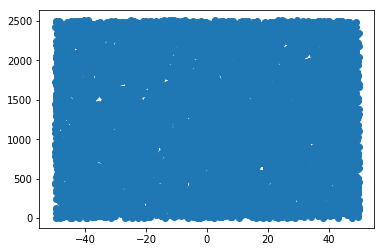

In [4]:
def sample_z(m):
    data_z = []
    x_ = 100*np.random.uniform(-0.5, 0.5, size=[m])
    y_ = 1000*np.random.uniform(0.0, 2.51 , size=[m])
    for i in range(m):
        data_z.append([x_[i],y_[i]])
    return np.asarray(data_z)
z_ = sample_z(10000)
print(np.shape(z_))
plt.scatter(z_[...,0],z_[...,1])

[-20.21926494  20.4406732  -13.00471298 ...   1.45892356  23.4920799
 -42.31944706]
[ 418.8186747   427.821121    179.12255956 ...   12.12845795  561.87781801
 1800.93559956]
49.972794216341455


2509.6105023071877

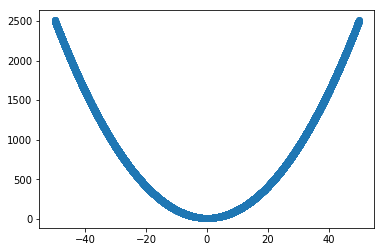

In [5]:
print(data[...,0])
print(data[...,1])
print(np.max(data[...,0]))
plt.scatter(data[...,0],data[...,1])
np.shape(data)
np.max(sample_z(10000))

In [6]:
def generator(Z, hsize = [16,16], reuse=False):
    with tf.variable_scope("GAN/Generator", reuse=reuse) as scope:
        if (reuse):
            tf.get_variable_scope().reuse_variables()
        h1 = tf.layers.dense(Z, hsize[0], activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1, hsize[1], activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

In [7]:
def discriminator(X, hsize=[16,16], reuse=False):
    with tf.variable_scope("GAN/Discriminator", reuse=reuse) as scope:
        if (reuse):
            tf.get_variable_scope().reuse_variables()
        h1 = tf.layers.dense(X, hsize[0], activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1, hsize[1], activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2, 2)
        out = tf.layers.dense(h3, 1)

    return out, h3

In [8]:
X = tf.placeholder(tf.float32, [None,2])
Z = tf.placeholder(tf.float32, [None,2])

In [9]:
G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample, reuse=True)

In [10]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits, labels=tf.ones_like(r_logits) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits, labels=tf.zeros_like(f_logits))))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits, labels=tf.ones_like(f_logits)))
#disc_loss = -tf.reduce_mean(tf.log(r_logits) + tf.log(1. - f_logits))
#gen_loss = -tf.reduce_mean(tf.log(f_logits))

In [17]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = "GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = "GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.0000001).minimize(gen_loss, var_list= gen_vars)
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.0000001).minimize(disc_loss, var_list=disc_vars)

#gen_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(gen_loss, var_list= gen_vars)
#disc_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(disc_loss, var_list=disc_vars)

#
#disc_solver = tf.train.AdamOptimizer().minimize(disc_loss, var_list = )

0
Iterations: 0	 Discriminator loss: 114.9138	 Generator loss: 58.2876


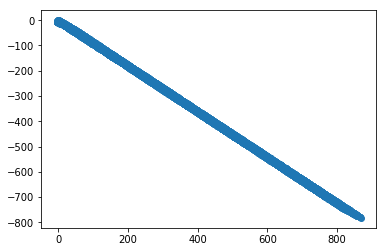

100
Iterations: 100	 Discriminator loss: 114.7287	 Generator loss: 57.7983


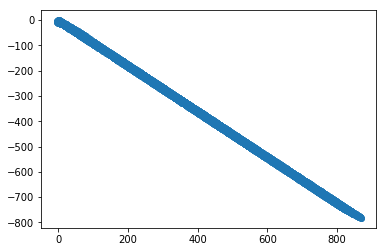

200
Iterations: 200	 Discriminator loss: 114.6285	 Generator loss: 57.9432


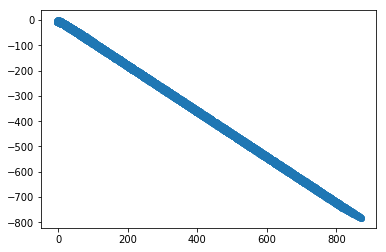

300
Iterations: 300	 Discriminator loss: 114.4893	 Generator loss: 57.5137


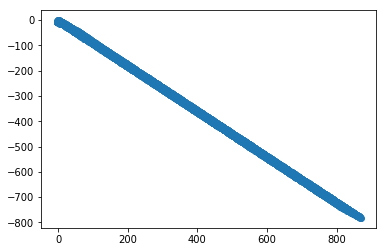

400
Iterations: 400	 Discriminator loss: 114.3693	 Generator loss: 57.7474


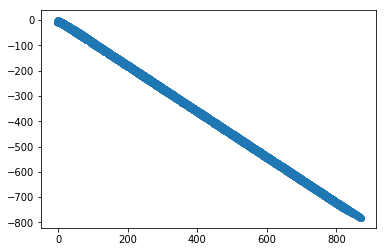

500
Iterations: 500	 Discriminator loss: 114.3471	 Generator loss: 58.1909


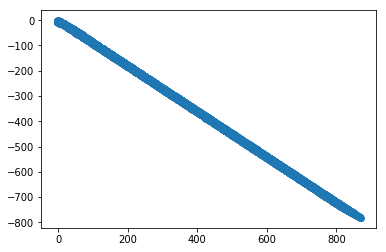

600
Iterations: 600	 Discriminator loss: 114.2944	 Generator loss: 58.4150


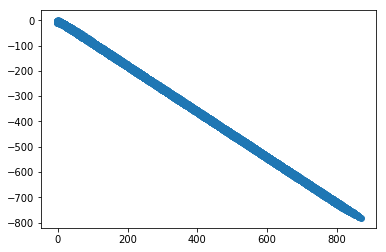

700
Iterations: 700	 Discriminator loss: 113.9736	 Generator loss: 58.1349


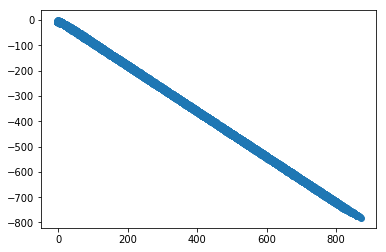

800
Iterations: 800	 Discriminator loss: 113.9458	 Generator loss: 57.8236


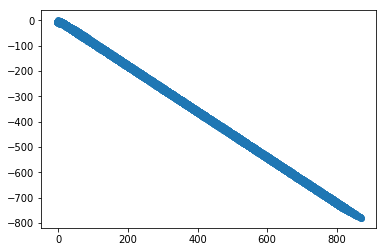

900
Iterations: 900	 Discriminator loss: 113.9051	 Generator loss: 58.2666


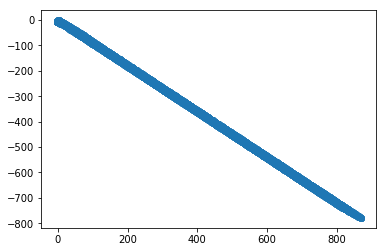

1000
Iterations: 1000	 Discriminator loss: 113.8132	 Generator loss: 57.9766


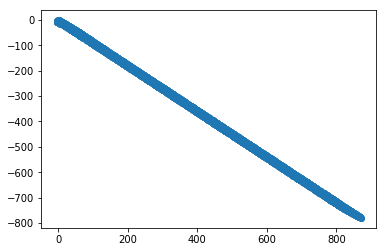

1100
Iterations: 1100	 Discriminator loss: 113.5464	 Generator loss: 57.6331


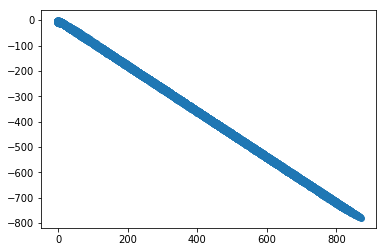

1200
Iterations: 1200	 Discriminator loss: 113.3985	 Generator loss: 58.1608


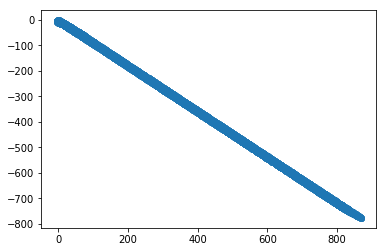

1300
Iterations: 1300	 Discriminator loss: 113.4070	 Generator loss: 57.8467


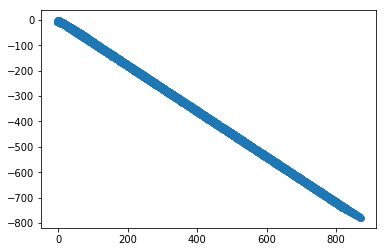

1400
Iterations: 1400	 Discriminator loss: 113.3327	 Generator loss: 57.5036


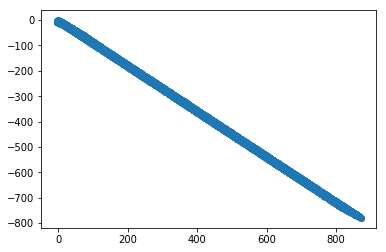

1500
Iterations: 1500	 Discriminator loss: 113.1459	 Generator loss: 57.6601


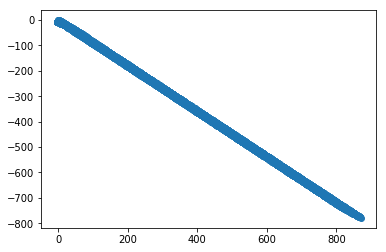

1600
Iterations: 1600	 Discriminator loss: 113.0159	 Generator loss: 57.3441


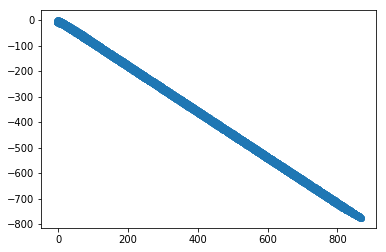

1700
Iterations: 1700	 Discriminator loss: 112.7944	 Generator loss: 57.5373


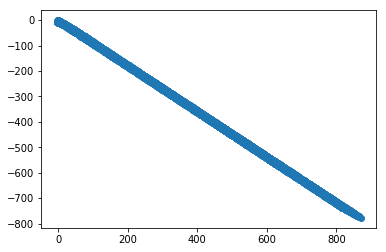

1800
Iterations: 1800	 Discriminator loss: 112.8282	 Generator loss: 57.9195


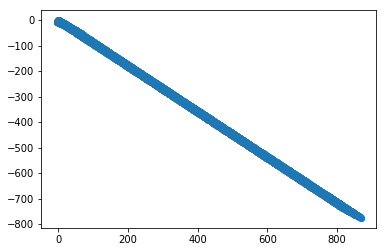

1900
Iterations: 1900	 Discriminator loss: 112.7402	 Generator loss: 57.8195


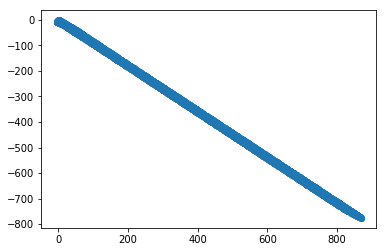

2000
Iterations: 2000	 Discriminator loss: 112.7159	 Generator loss: 57.3505


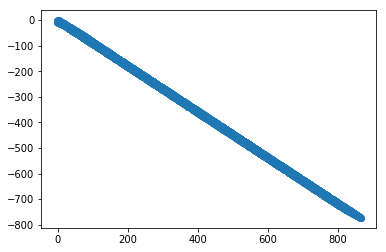

2100
Iterations: 2100	 Discriminator loss: 112.4917	 Generator loss: 57.6643


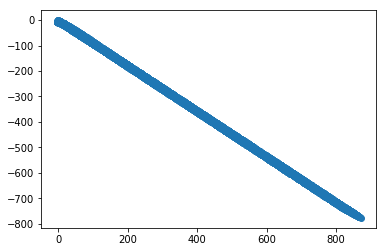

2200
Iterations: 2200	 Discriminator loss: 112.2747	 Generator loss: 57.8331


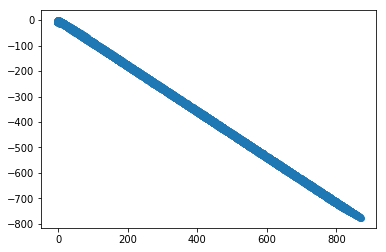

2300
Iterations: 2300	 Discriminator loss: 112.1866	 Generator loss: 57.4527


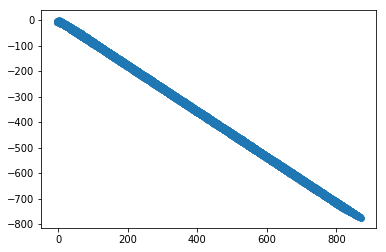

2400
Iterations: 2400	 Discriminator loss: 112.0980	 Generator loss: 57.2962


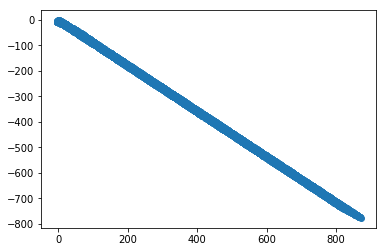

2500
Iterations: 2500	 Discriminator loss: 112.0673	 Generator loss: 57.3960


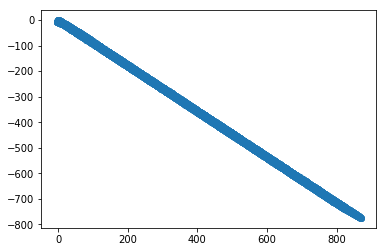

2600
Iterations: 2600	 Discriminator loss: 111.9069	 Generator loss: 57.4897


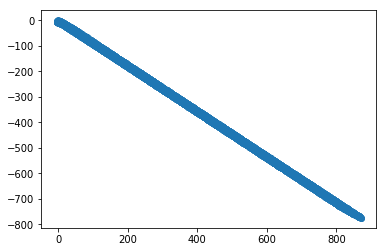

2700
Iterations: 2700	 Discriminator loss: 111.7925	 Generator loss: 57.3453


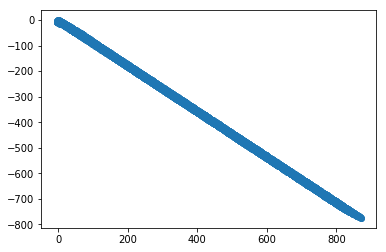

2800
Iterations: 2800	 Discriminator loss: 111.7316	 Generator loss: 57.9738


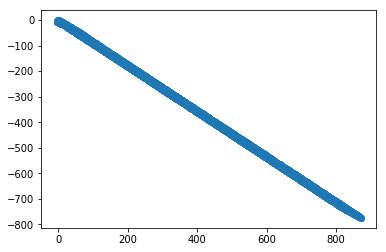

2900
Iterations: 2900	 Discriminator loss: 111.5564	 Generator loss: 57.1523


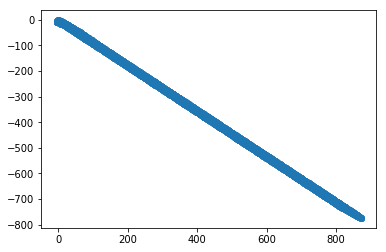

3000
Iterations: 3000	 Discriminator loss: 111.3678	 Generator loss: 57.2015


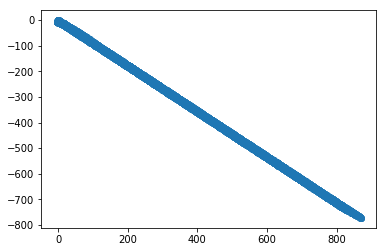

3100
Iterations: 3100	 Discriminator loss: 111.5222	 Generator loss: 57.4411


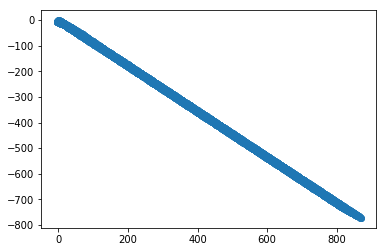

3200
Iterations: 3200	 Discriminator loss: 111.2398	 Generator loss: 57.2070


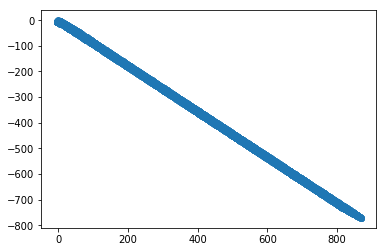

3300
Iterations: 3300	 Discriminator loss: 111.0897	 Generator loss: 56.7326


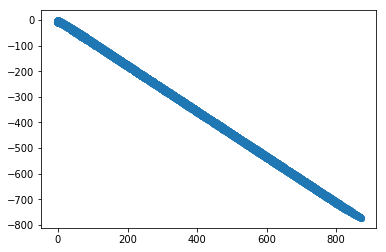

3400
Iterations: 3400	 Discriminator loss: 110.9639	 Generator loss: 57.0087


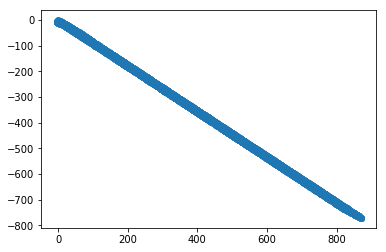

3500
Iterations: 3500	 Discriminator loss: 110.8992	 Generator loss: 57.2717


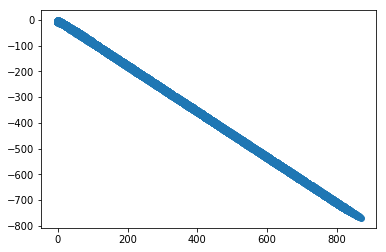

3600
Iterations: 3600	 Discriminator loss: 110.7792	 Generator loss: 57.3457


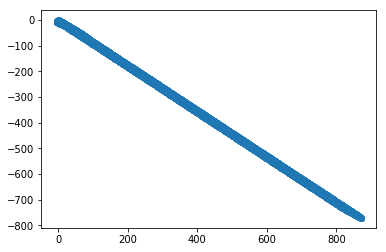

3700
Iterations: 3700	 Discriminator loss: 110.7395	 Generator loss: 57.1271


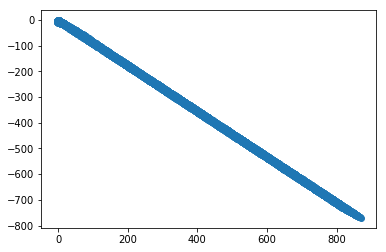

3800
Iterations: 3800	 Discriminator loss: 110.5328	 Generator loss: 57.0405


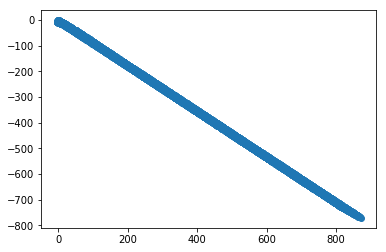

3900
Iterations: 3900	 Discriminator loss: 110.4174	 Generator loss: 56.7913


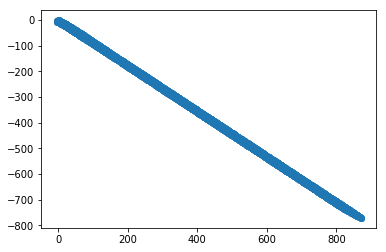

4000
Iterations: 4000	 Discriminator loss: 110.3192	 Generator loss: 56.8505


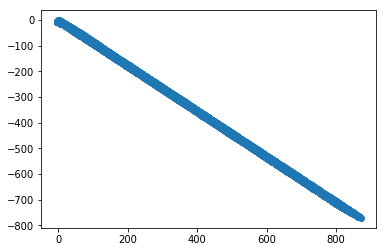

4100
Iterations: 4100	 Discriminator loss: 110.2114	 Generator loss: 56.7160


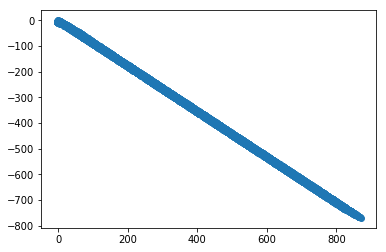

4200
Iterations: 4200	 Discriminator loss: 110.0684	 Generator loss: 57.3709


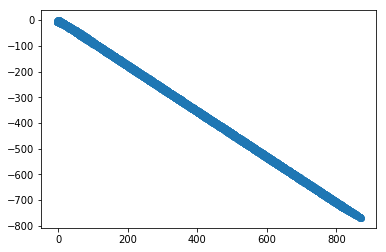

4300
Iterations: 4300	 Discriminator loss: 109.8790	 Generator loss: 56.9365


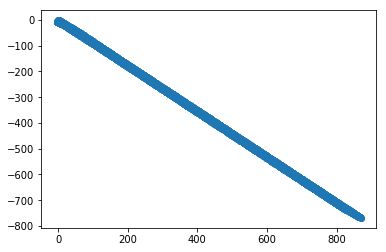

4400
Iterations: 4400	 Discriminator loss: 109.8118	 Generator loss: 57.1039


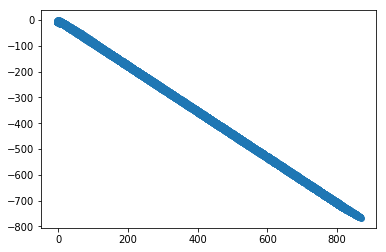

4500
Iterations: 4500	 Discriminator loss: 109.7153	 Generator loss: 57.0760


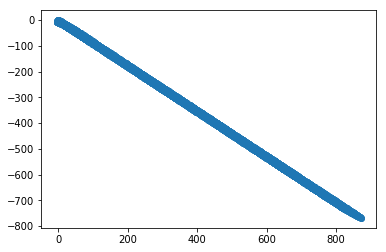

4600
Iterations: 4600	 Discriminator loss: 109.6281	 Generator loss: 57.3390


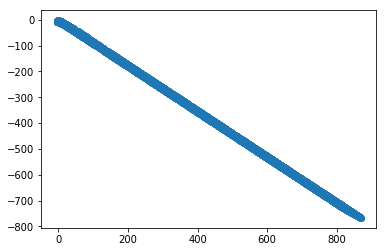

4700
Iterations: 4700	 Discriminator loss: 109.5152	 Generator loss: 56.8067


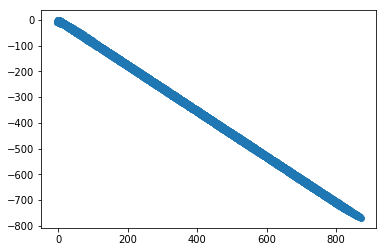

4800
Iterations: 4800	 Discriminator loss: 109.3924	 Generator loss: 57.0378


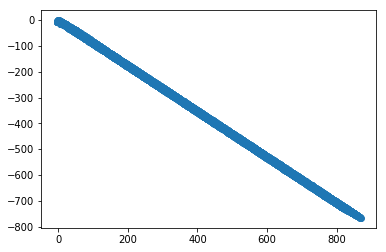

4900
Iterations: 4900	 Discriminator loss: 109.3092	 Generator loss: 56.8271


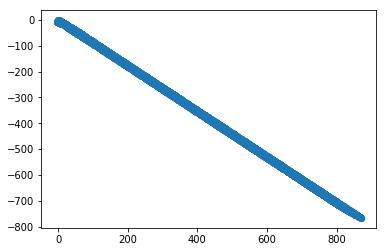

5000
Iterations: 5000	 Discriminator loss: 109.1900	 Generator loss: 55.8992


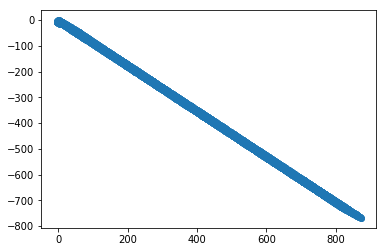

5100
Iterations: 5100	 Discriminator loss: 108.9932	 Generator loss: 57.1050


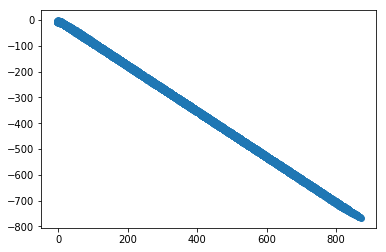

5200
Iterations: 5200	 Discriminator loss: 108.9758	 Generator loss: 57.1820


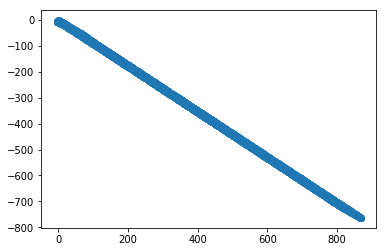

5300
Iterations: 5300	 Discriminator loss: 108.7530	 Generator loss: 56.5370


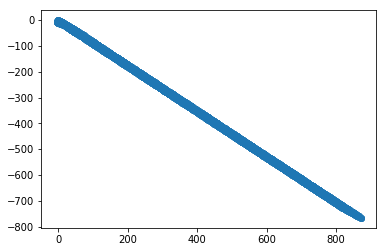

5400
Iterations: 5400	 Discriminator loss: 108.5952	 Generator loss: 56.4651


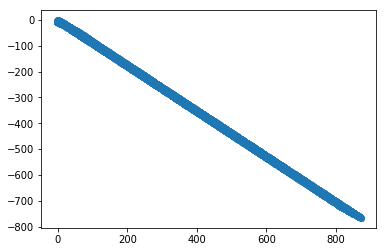

5500
Iterations: 5500	 Discriminator loss: 108.5531	 Generator loss: 56.0647


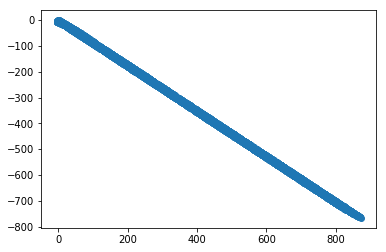

5600
Iterations: 5600	 Discriminator loss: 108.4136	 Generator loss: 56.8331


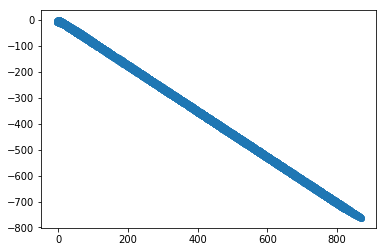

5700
Iterations: 5700	 Discriminator loss: 108.2878	 Generator loss: 56.4634


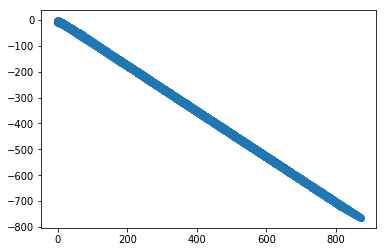

5800
Iterations: 5800	 Discriminator loss: 108.2380	 Generator loss: 56.6647


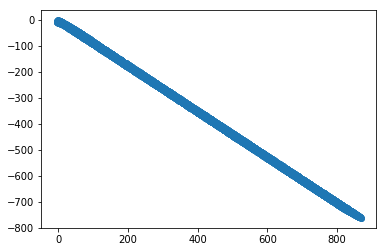

5900
Iterations: 5900	 Discriminator loss: 108.0114	 Generator loss: 56.3376


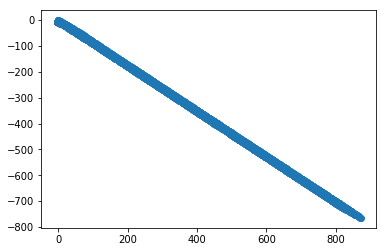

6000
Iterations: 6000	 Discriminator loss: 107.8868	 Generator loss: 56.5836


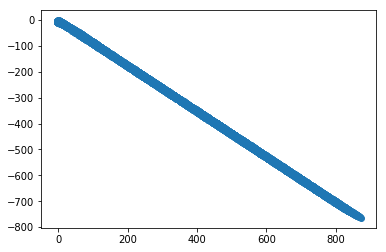

6100
Iterations: 6100	 Discriminator loss: 107.8054	 Generator loss: 56.4563


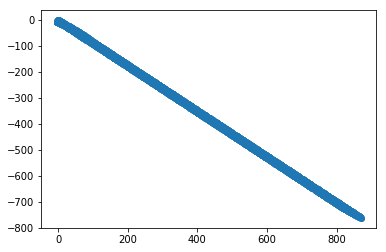

6200
Iterations: 6200	 Discriminator loss: 107.7558	 Generator loss: 56.5704


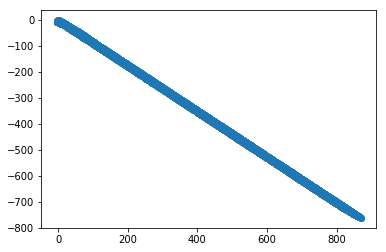

6300
Iterations: 6300	 Discriminator loss: 107.6405	 Generator loss: 56.8590


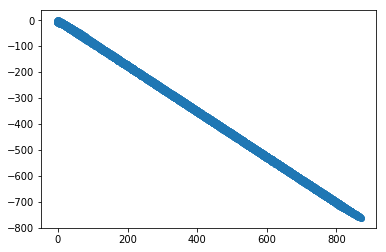

6400
Iterations: 6400	 Discriminator loss: 107.5471	 Generator loss: 56.2017


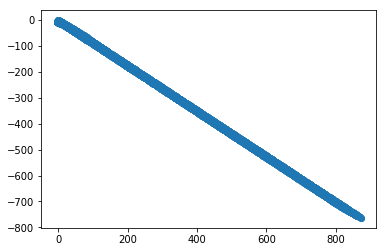

6500
Iterations: 6500	 Discriminator loss: 107.3795	 Generator loss: 56.6727


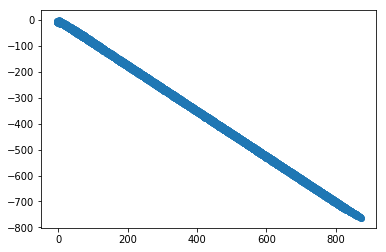

6600
Iterations: 6600	 Discriminator loss: 107.2044	 Generator loss: 56.0596


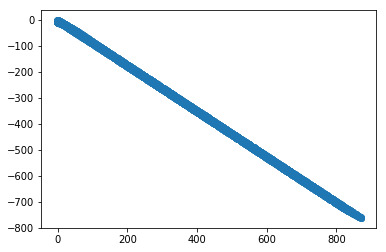

6700
Iterations: 6700	 Discriminator loss: 107.2445	 Generator loss: 56.2869


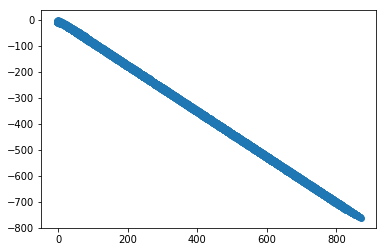

6800
Iterations: 6800	 Discriminator loss: 106.9937	 Generator loss: 56.6406


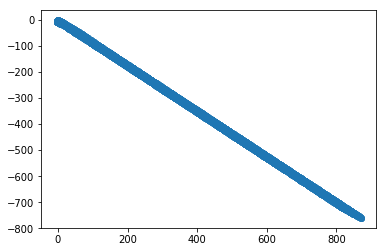

6900
Iterations: 6900	 Discriminator loss: 107.0194	 Generator loss: 56.9092


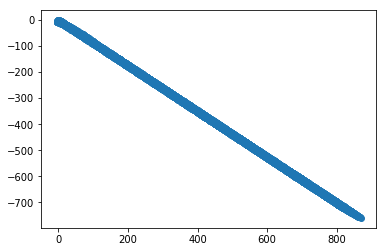

7000
Iterations: 7000	 Discriminator loss: 106.8460	 Generator loss: 56.4014


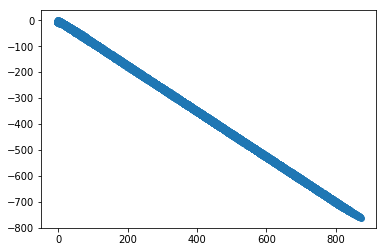

7100
Iterations: 7100	 Discriminator loss: 106.6710	 Generator loss: 56.2491


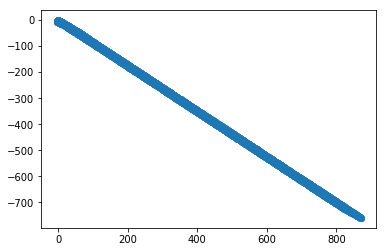

7200
Iterations: 7200	 Discriminator loss: 106.5769	 Generator loss: 56.1587


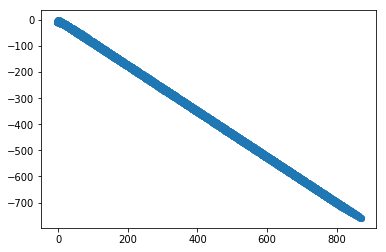

7300
Iterations: 7300	 Discriminator loss: 106.3355	 Generator loss: 56.8091


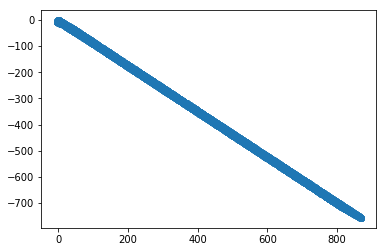

7400
Iterations: 7400	 Discriminator loss: 106.4198	 Generator loss: 56.0380


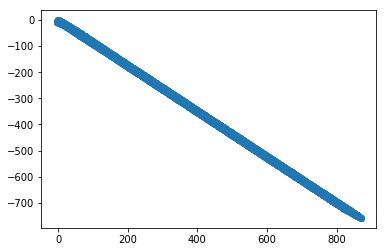

7500
Iterations: 7500	 Discriminator loss: 106.3271	 Generator loss: 56.3301


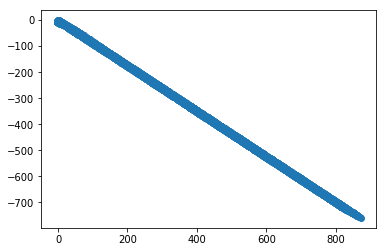

7600
Iterations: 7600	 Discriminator loss: 106.0835	 Generator loss: 57.0569


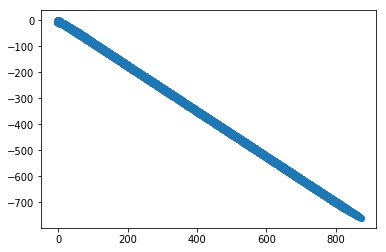

7700
Iterations: 7700	 Discriminator loss: 106.0464	 Generator loss: 56.0701


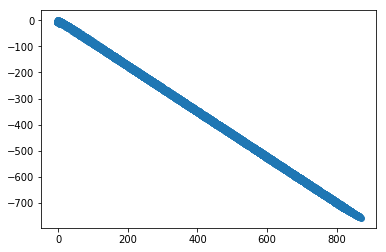

7800
Iterations: 7800	 Discriminator loss: 106.0078	 Generator loss: 57.0155


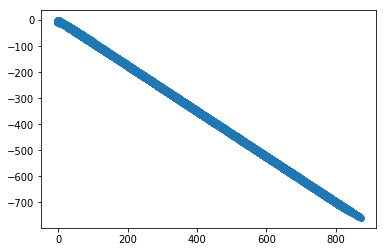

7900
Iterations: 7900	 Discriminator loss: 105.7020	 Generator loss: 56.5632


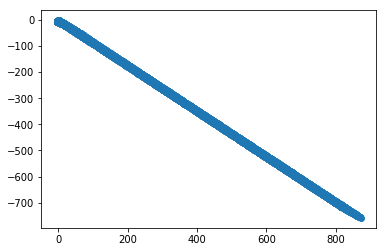

8000
Iterations: 8000	 Discriminator loss: 105.7657	 Generator loss: 56.3838


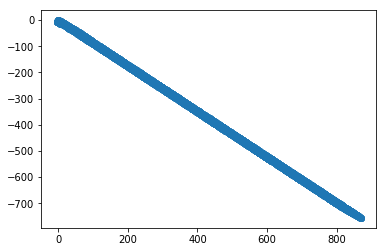

8100
Iterations: 8100	 Discriminator loss: 105.5876	 Generator loss: 55.8684


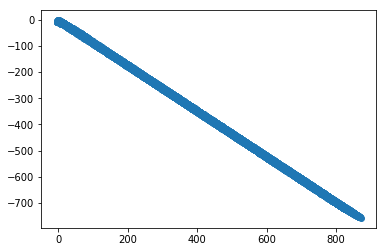

8200
Iterations: 8200	 Discriminator loss: 105.4401	 Generator loss: 55.9575


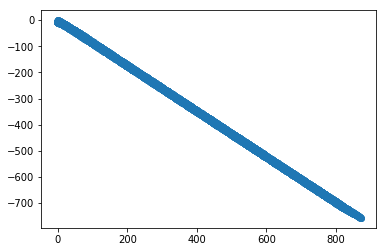

8300
Iterations: 8300	 Discriminator loss: 105.3338	 Generator loss: 55.9411


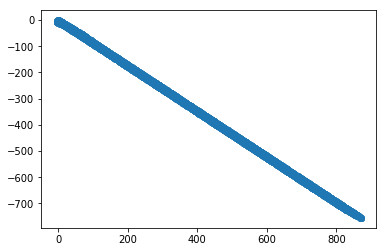

8400
Iterations: 8400	 Discriminator loss: 105.2916	 Generator loss: 55.8550


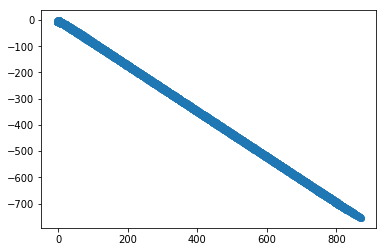

8500
Iterations: 8500	 Discriminator loss: 105.0474	 Generator loss: 56.5552


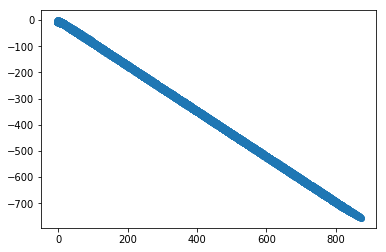

8600
Iterations: 8600	 Discriminator loss: 104.9790	 Generator loss: 56.1499


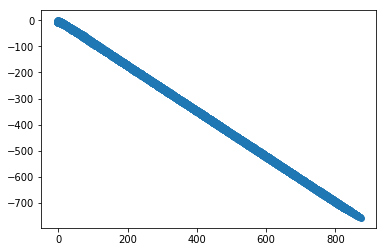

8700
Iterations: 8700	 Discriminator loss: 104.8775	 Generator loss: 55.9125


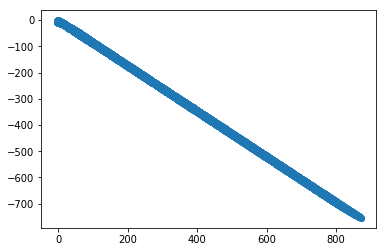

8800
Iterations: 8800	 Discriminator loss: 104.7364	 Generator loss: 55.4372


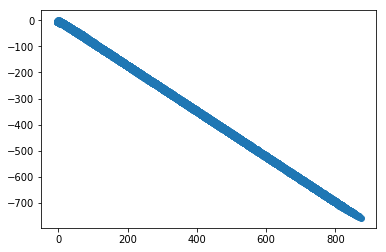

8900
Iterations: 8900	 Discriminator loss: 104.6967	 Generator loss: 55.7240


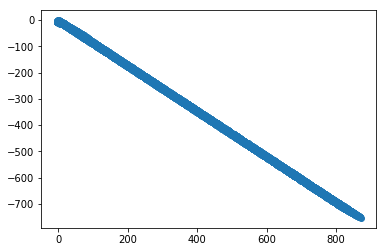

9000
Iterations: 9000	 Discriminator loss: 104.5035	 Generator loss: 55.5551


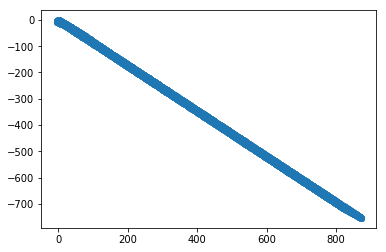

9100
Iterations: 9100	 Discriminator loss: 104.4822	 Generator loss: 55.1693


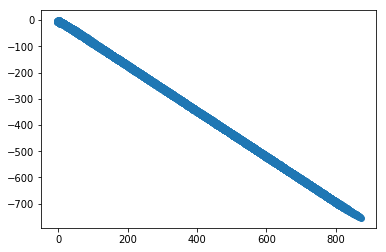

9200
Iterations: 9200	 Discriminator loss: 104.3162	 Generator loss: 55.6623


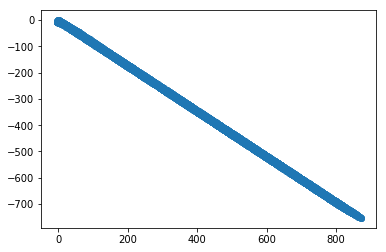

9300
Iterations: 9300	 Discriminator loss: 104.2227	 Generator loss: 55.3626


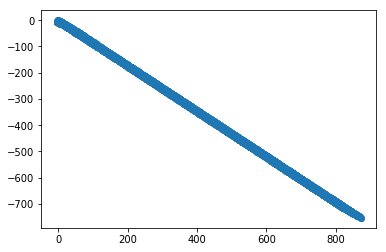

9400
Iterations: 9400	 Discriminator loss: 104.0987	 Generator loss: 55.9524


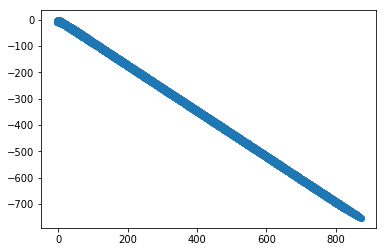

9500
Iterations: 9500	 Discriminator loss: 103.9400	 Generator loss: 55.9742


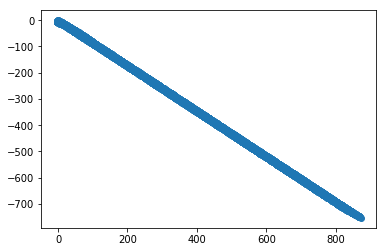

9600
Iterations: 9600	 Discriminator loss: 103.8964	 Generator loss: 55.7765


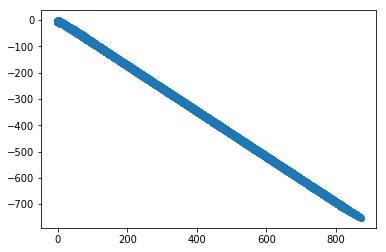

9700
Iterations: 9700	 Discriminator loss: 103.8296	 Generator loss: 55.7854


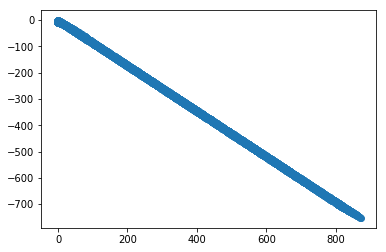

9800
Iterations: 9800	 Discriminator loss: 103.6070	 Generator loss: 55.3168


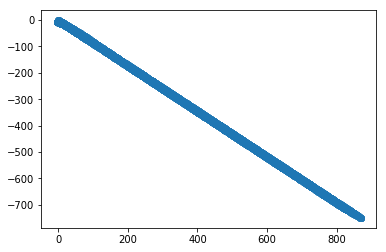

9900
Iterations: 9900	 Discriminator loss: 103.4332	 Generator loss: 55.5429


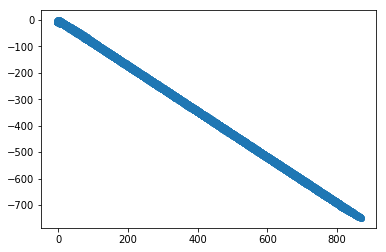

10000
Iterations: 10000	 Discriminator loss: 103.4372	 Generator loss: 55.2817


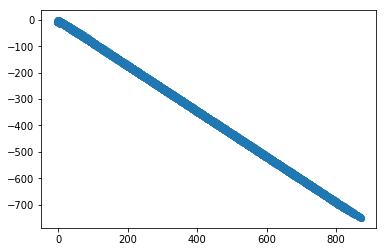

10100
Iterations: 10100	 Discriminator loss: 103.2645	 Generator loss: 55.3891


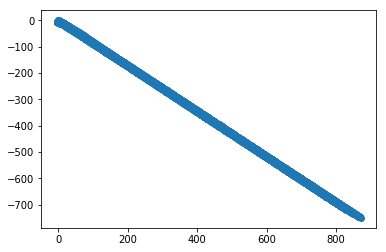

10200
Iterations: 10200	 Discriminator loss: 103.1250	 Generator loss: 55.5684


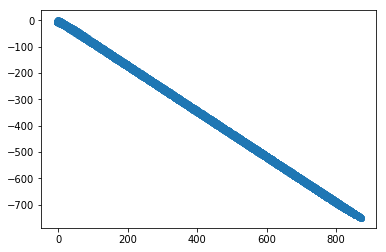

10300
Iterations: 10300	 Discriminator loss: 103.0120	 Generator loss: 55.7896


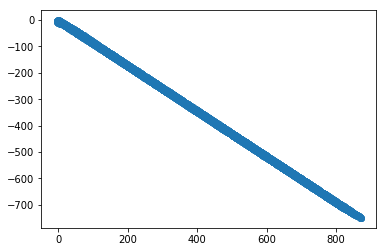

10400
Iterations: 10400	 Discriminator loss: 102.8821	 Generator loss: 55.2720


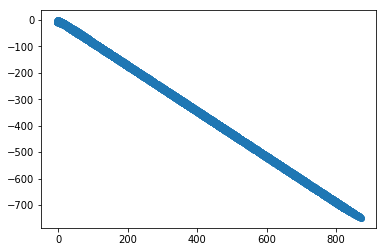

10500
Iterations: 10500	 Discriminator loss: 102.9150	 Generator loss: 55.5261


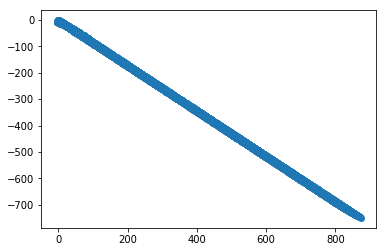

10600
Iterations: 10600	 Discriminator loss: 102.7433	 Generator loss: 55.0051


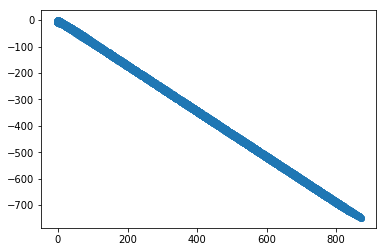

10700
Iterations: 10700	 Discriminator loss: 102.5675	 Generator loss: 55.2450


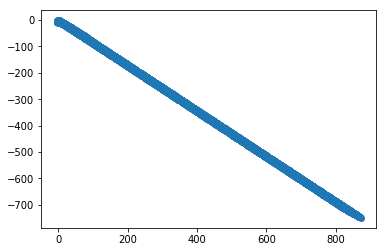

10800
Iterations: 10800	 Discriminator loss: 102.4440	 Generator loss: 55.2248


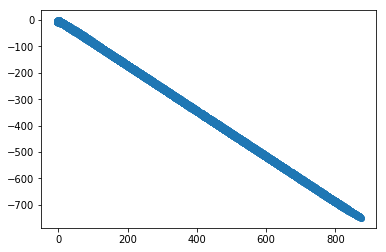

10900
Iterations: 10900	 Discriminator loss: 102.2829	 Generator loss: 54.7389


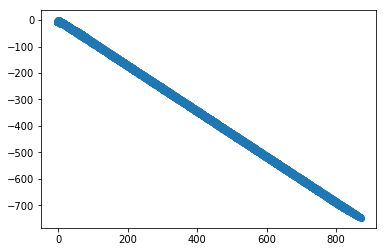

11000
Iterations: 11000	 Discriminator loss: 102.2376	 Generator loss: 55.2581


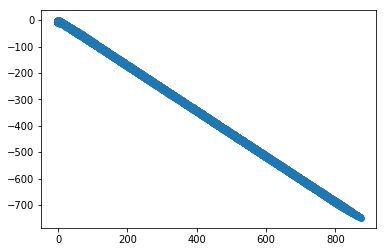

11100
Iterations: 11100	 Discriminator loss: 102.2240	 Generator loss: 55.5569


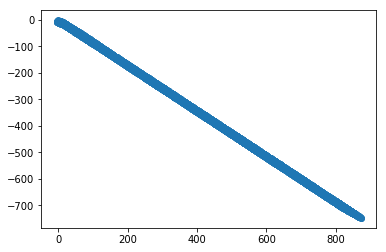

11200
Iterations: 11200	 Discriminator loss: 101.9876	 Generator loss: 55.1568


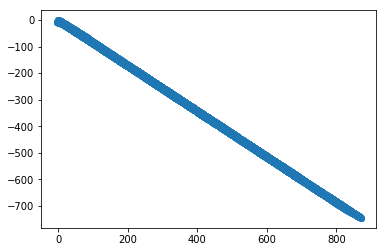

11300
Iterations: 11300	 Discriminator loss: 101.9314	 Generator loss: 54.8993


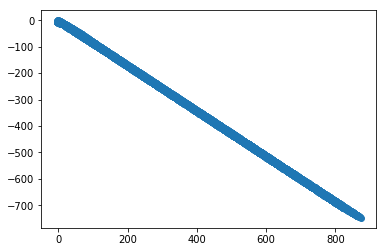

11400
Iterations: 11400	 Discriminator loss: 101.8351	 Generator loss: 55.1684


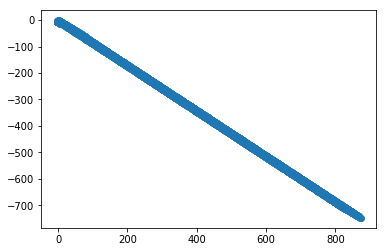

11500
Iterations: 11500	 Discriminator loss: 101.7017	 Generator loss: 54.8518


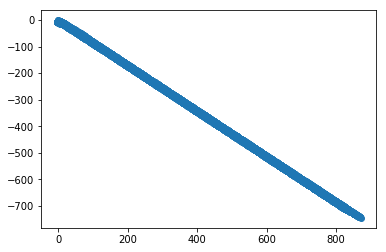

11600
Iterations: 11600	 Discriminator loss: 101.5024	 Generator loss: 54.5180


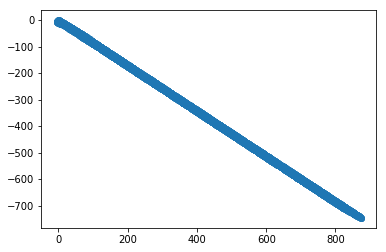

11700
Iterations: 11700	 Discriminator loss: 101.3610	 Generator loss: 55.2546


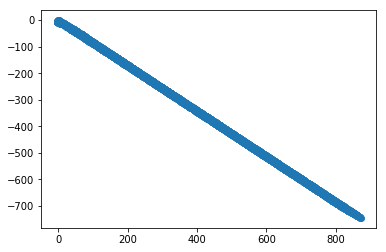

11800
Iterations: 11800	 Discriminator loss: 101.3143	 Generator loss: 54.3800


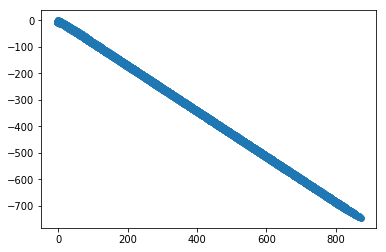

11900
Iterations: 11900	 Discriminator loss: 101.1663	 Generator loss: 55.1676


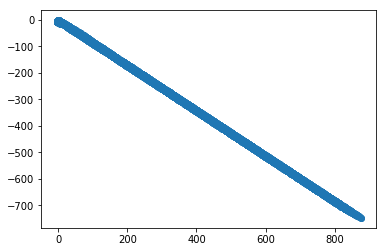

12000
Iterations: 12000	 Discriminator loss: 101.0593	 Generator loss: 55.1836


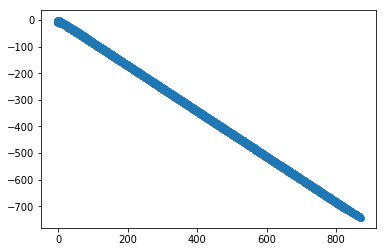

12100
Iterations: 12100	 Discriminator loss: 100.9253	 Generator loss: 54.8924


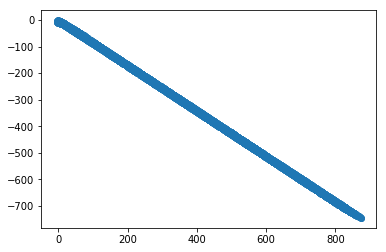

12200
Iterations: 12200	 Discriminator loss: 100.8334	 Generator loss: 55.0064


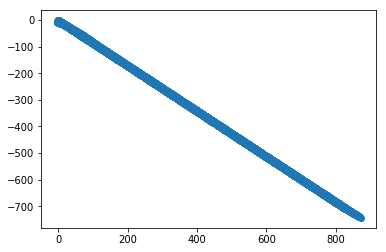

12300
Iterations: 12300	 Discriminator loss: 100.7850	 Generator loss: 54.8300


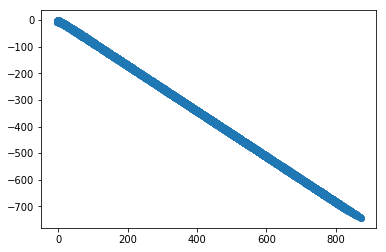

12400
Iterations: 12400	 Discriminator loss: 100.6182	 Generator loss: 55.0355


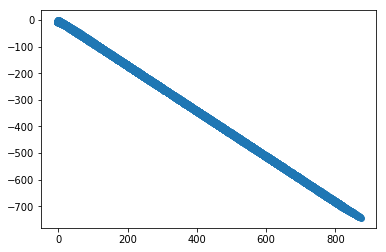

12500
Iterations: 12500	 Discriminator loss: 100.4356	 Generator loss: 54.5942


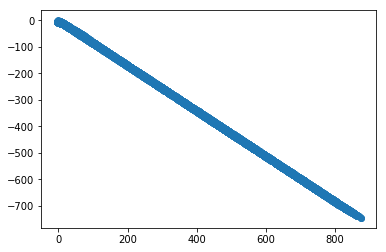

12600
Iterations: 12600	 Discriminator loss: 100.4004	 Generator loss: 54.8696


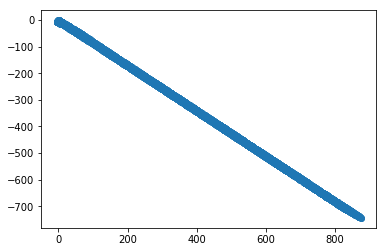

12700
Iterations: 12700	 Discriminator loss: 100.2526	 Generator loss: 54.9716


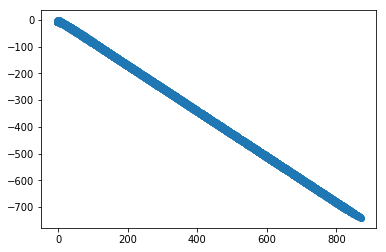

12800
Iterations: 12800	 Discriminator loss: 100.1413	 Generator loss: 54.9588


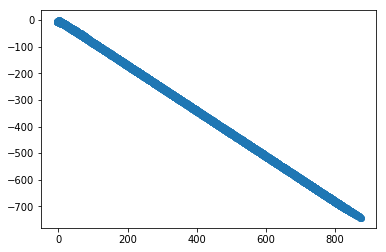

12900
Iterations: 12900	 Discriminator loss: 100.1226	 Generator loss: 54.1504


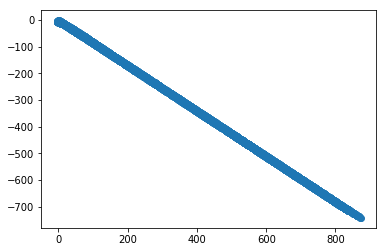

13000
Iterations: 13000	 Discriminator loss: 99.9452	 Generator loss: 54.8278


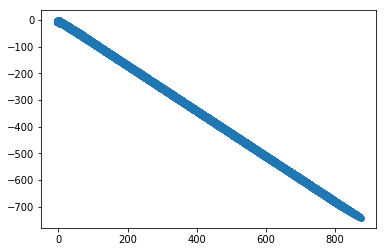

13100
Iterations: 13100	 Discriminator loss: 99.7886	 Generator loss: 55.0618


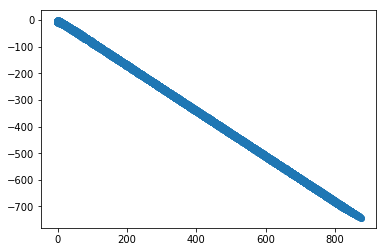

13200
Iterations: 13200	 Discriminator loss: 99.7332	 Generator loss: 54.3085


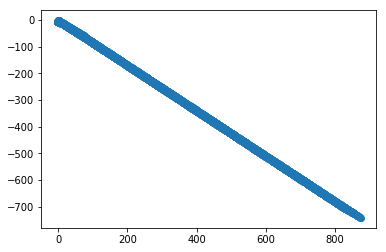

13300
Iterations: 13300	 Discriminator loss: 99.5444	 Generator loss: 54.3258


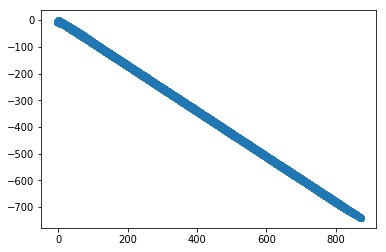

13400
Iterations: 13400	 Discriminator loss: 99.5184	 Generator loss: 54.4593


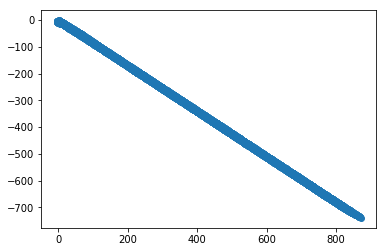

13500
Iterations: 13500	 Discriminator loss: 99.3457	 Generator loss: 53.8481


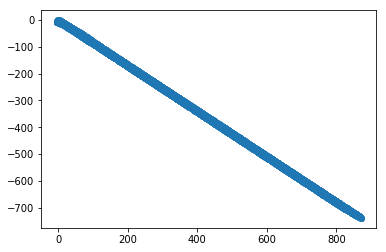

13600
Iterations: 13600	 Discriminator loss: 99.2587	 Generator loss: 54.1096


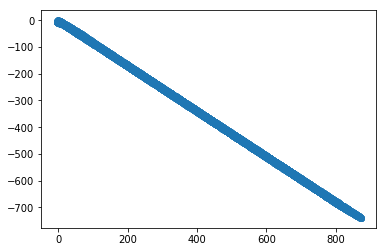

13700
Iterations: 13700	 Discriminator loss: 99.0960	 Generator loss: 54.7077


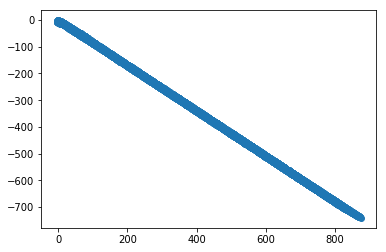

13800
Iterations: 13800	 Discriminator loss: 99.0216	 Generator loss: 54.0476


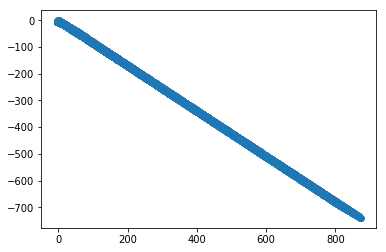

13900
Iterations: 13900	 Discriminator loss: 98.8690	 Generator loss: 54.6744


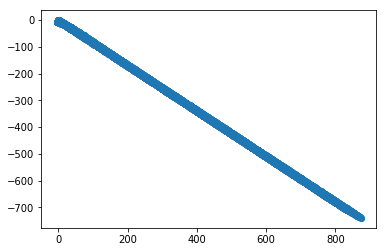

14000
Iterations: 14000	 Discriminator loss: 98.7841	 Generator loss: 53.9650


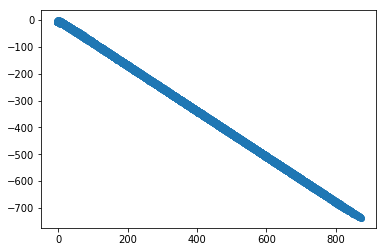

14100
Iterations: 14100	 Discriminator loss: 98.6949	 Generator loss: 54.6967


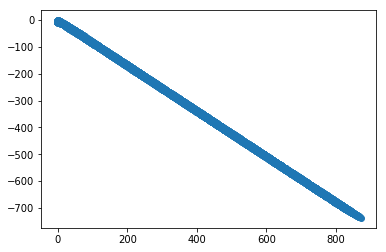

14200
Iterations: 14200	 Discriminator loss: 98.5313	 Generator loss: 54.1242


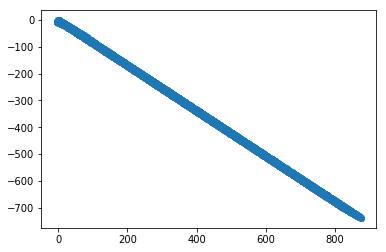

14300
Iterations: 14300	 Discriminator loss: 98.5099	 Generator loss: 53.6676


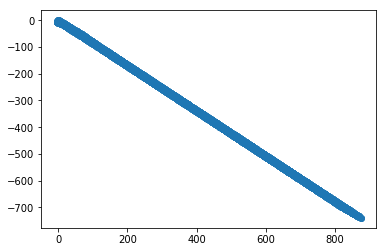

14400
Iterations: 14400	 Discriminator loss: 98.3398	 Generator loss: 54.6321


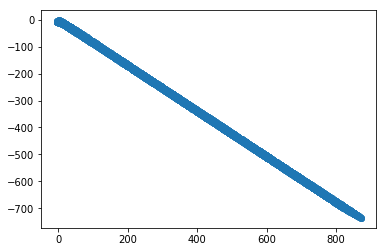

14500
Iterations: 14500	 Discriminator loss: 98.1556	 Generator loss: 54.2842


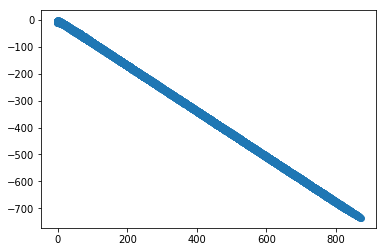

14600
Iterations: 14600	 Discriminator loss: 98.0601	 Generator loss: 53.7377


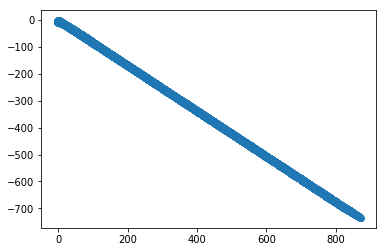

14700
Iterations: 14700	 Discriminator loss: 97.9966	 Generator loss: 53.9062


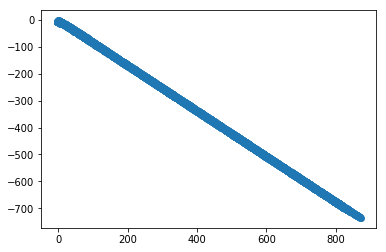

14800
Iterations: 14800	 Discriminator loss: 97.8650	 Generator loss: 54.2443


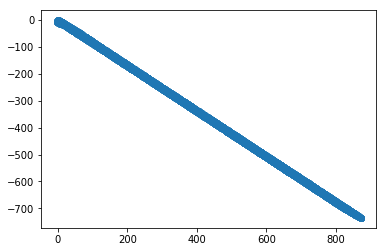

14900
Iterations: 14900	 Discriminator loss: 97.7453	 Generator loss: 54.0270


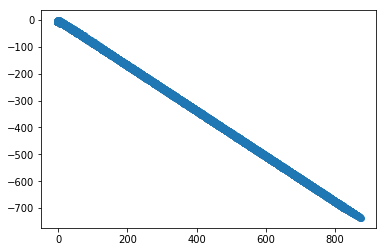

15000
Iterations: 15000	 Discriminator loss: 97.6374	 Generator loss: 53.6356


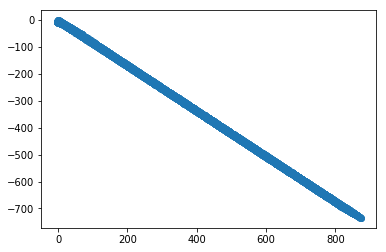

15100
Iterations: 15100	 Discriminator loss: 97.6439	 Generator loss: 53.2036


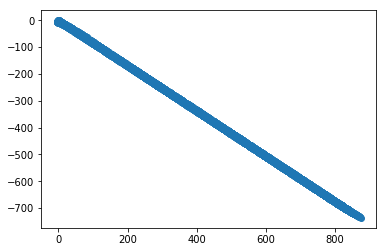

15200
Iterations: 15200	 Discriminator loss: 97.4915	 Generator loss: 53.1976


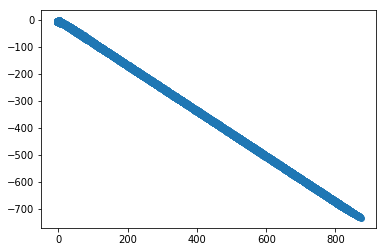

15300
Iterations: 15300	 Discriminator loss: 97.4109	 Generator loss: 53.5579


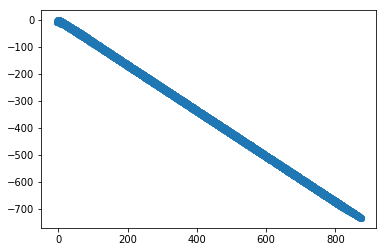

15400
Iterations: 15400	 Discriminator loss: 97.2217	 Generator loss: 53.4166


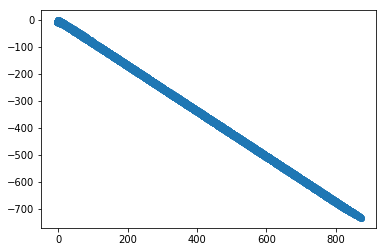

15500
Iterations: 15500	 Discriminator loss: 97.0913	 Generator loss: 53.2130


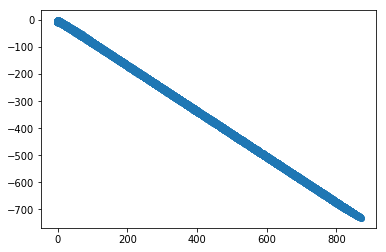

15600
Iterations: 15600	 Discriminator loss: 96.9444	 Generator loss: 53.9336


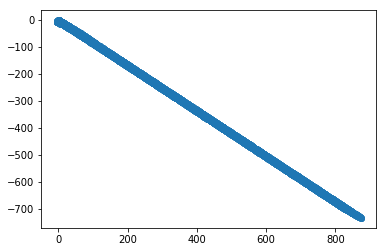

15700
Iterations: 15700	 Discriminator loss: 96.9163	 Generator loss: 53.2730


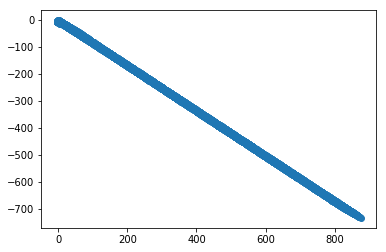

15800
Iterations: 15800	 Discriminator loss: 96.6965	 Generator loss: 53.0646


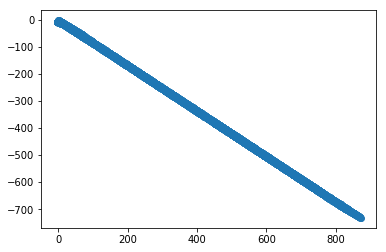

15900
Iterations: 15900	 Discriminator loss: 96.5981	 Generator loss: 53.1146


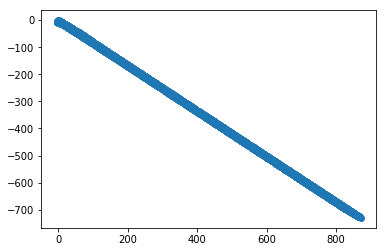

16000
Iterations: 16000	 Discriminator loss: 96.5500	 Generator loss: 53.6250


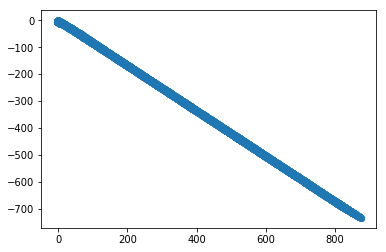

16100
Iterations: 16100	 Discriminator loss: 96.3709	 Generator loss: 53.8142


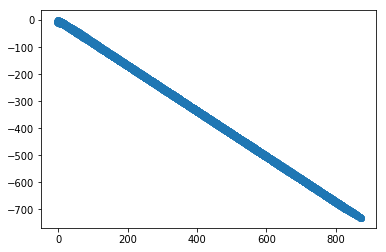

16200
Iterations: 16200	 Discriminator loss: 96.3050	 Generator loss: 54.0880


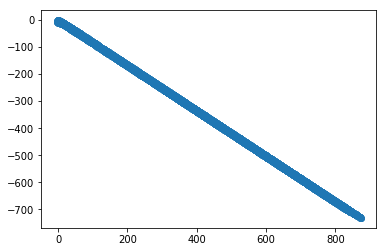

16300
Iterations: 16300	 Discriminator loss: 96.1152	 Generator loss: 52.8052


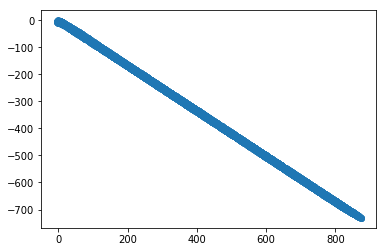

16400
Iterations: 16400	 Discriminator loss: 96.1426	 Generator loss: 53.0331


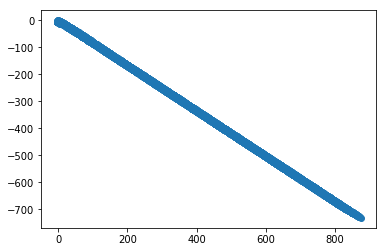

16500
Iterations: 16500	 Discriminator loss: 95.8440	 Generator loss: 53.4843


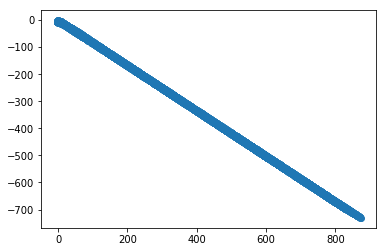

16600
Iterations: 16600	 Discriminator loss: 95.8270	 Generator loss: 53.3847


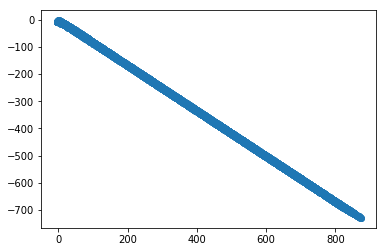

16700
Iterations: 16700	 Discriminator loss: 95.6524	 Generator loss: 53.1784


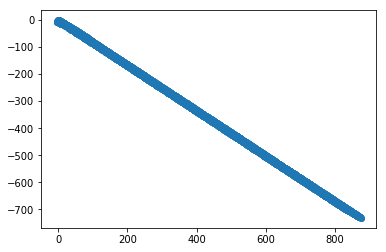

16800
Iterations: 16800	 Discriminator loss: 95.5895	 Generator loss: 52.8926


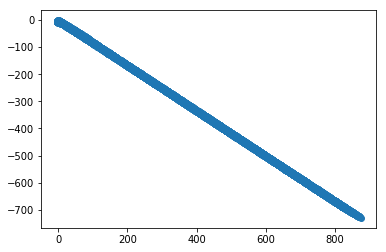

16900
Iterations: 16900	 Discriminator loss: 95.4789	 Generator loss: 52.7634


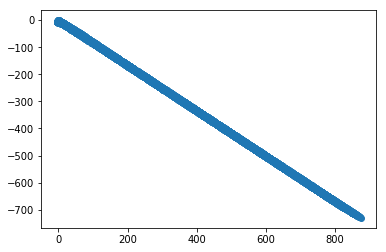

17000
Iterations: 17000	 Discriminator loss: 95.3254	 Generator loss: 52.6928


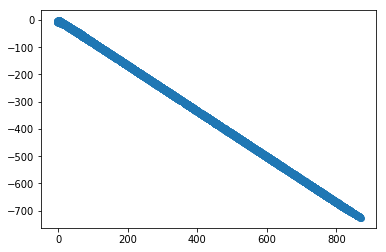

17100
Iterations: 17100	 Discriminator loss: 95.2019	 Generator loss: 53.0458


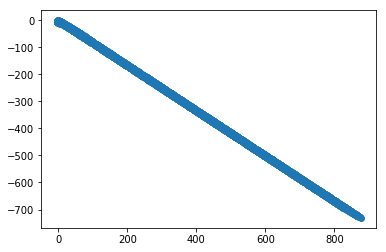

17200
Iterations: 17200	 Discriminator loss: 95.0436	 Generator loss: 53.0554


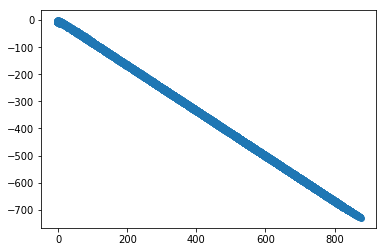

17300
Iterations: 17300	 Discriminator loss: 95.0100	 Generator loss: 52.7877


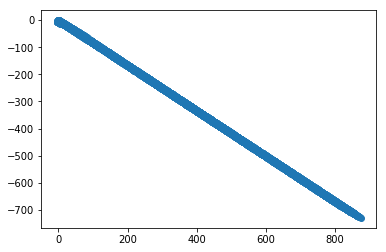

17400
Iterations: 17400	 Discriminator loss: 94.8670	 Generator loss: 53.3476


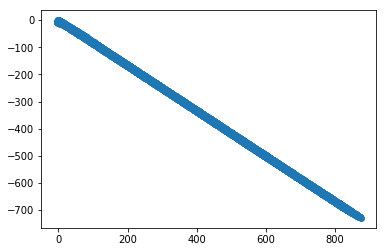

17500
Iterations: 17500	 Discriminator loss: 94.7491	 Generator loss: 52.9370


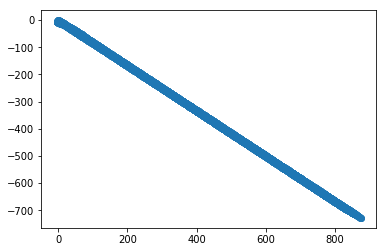

17600
Iterations: 17600	 Discriminator loss: 94.6433	 Generator loss: 52.9728


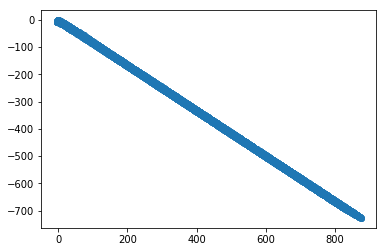

17700
Iterations: 17700	 Discriminator loss: 94.6024	 Generator loss: 53.0279


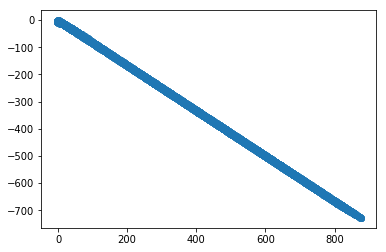

17800
Iterations: 17800	 Discriminator loss: 94.4249	 Generator loss: 52.4341


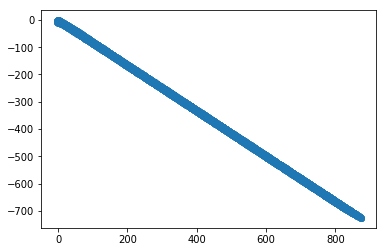

17900
Iterations: 17900	 Discriminator loss: 94.3822	 Generator loss: 52.6641


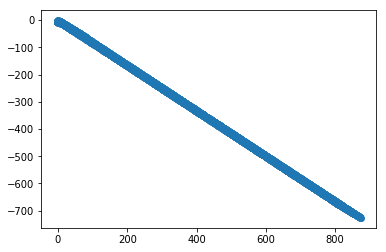

18000
Iterations: 18000	 Discriminator loss: 94.2339	 Generator loss: 52.6320


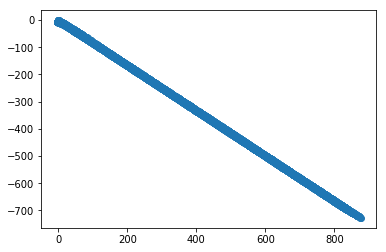

18100
Iterations: 18100	 Discriminator loss: 94.0729	 Generator loss: 52.8136


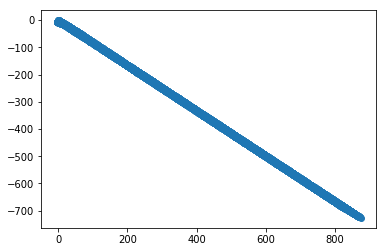

18200
Iterations: 18200	 Discriminator loss: 93.9741	 Generator loss: 52.1225


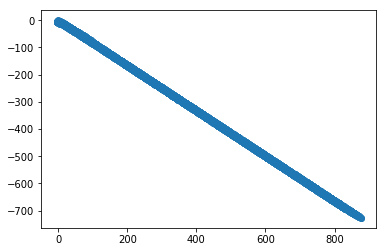

18300
Iterations: 18300	 Discriminator loss: 93.8570	 Generator loss: 53.0091


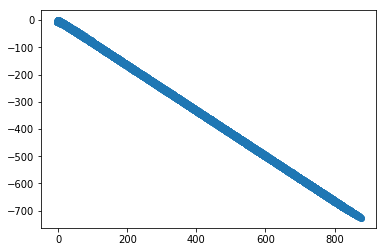

18400
Iterations: 18400	 Discriminator loss: 93.7353	 Generator loss: 52.5004


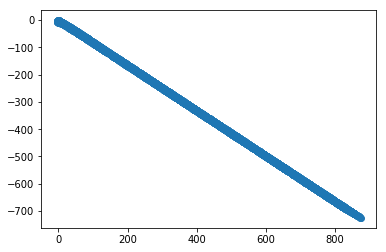

18500
Iterations: 18500	 Discriminator loss: 93.6416	 Generator loss: 52.8692


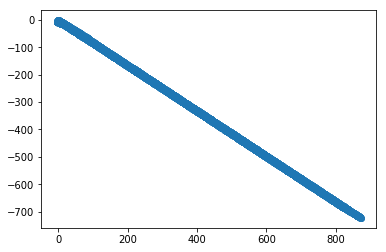

18600
Iterations: 18600	 Discriminator loss: 93.4646	 Generator loss: 52.2968


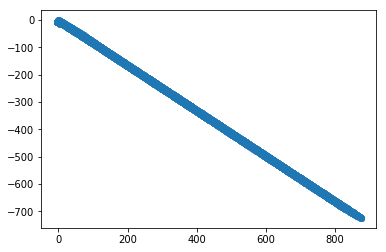

18700
Iterations: 18700	 Discriminator loss: 93.3630	 Generator loss: 52.3940


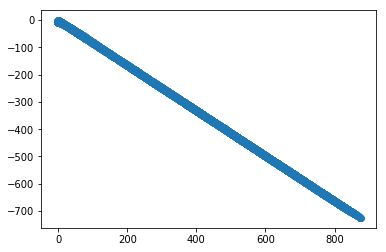

18800
Iterations: 18800	 Discriminator loss: 93.2132	 Generator loss: 52.0446


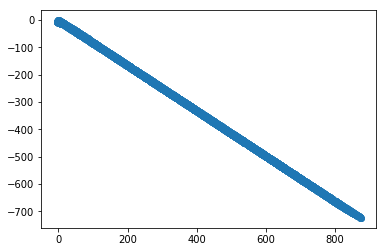

18900
Iterations: 18900	 Discriminator loss: 93.1336	 Generator loss: 52.3194


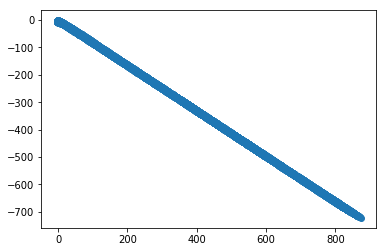

19000
Iterations: 19000	 Discriminator loss: 93.0444	 Generator loss: 52.0397


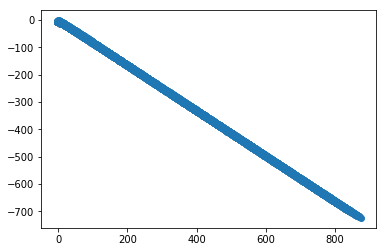

19100
Iterations: 19100	 Discriminator loss: 93.0002	 Generator loss: 52.3859


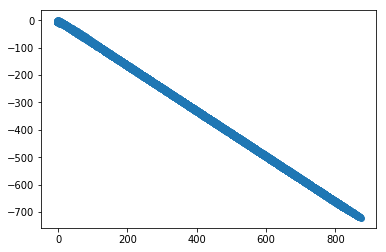

19200
Iterations: 19200	 Discriminator loss: 92.8324	 Generator loss: 52.1714


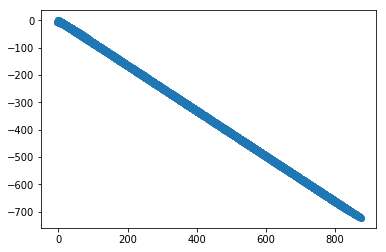

19300
Iterations: 19300	 Discriminator loss: 92.7481	 Generator loss: 52.1745


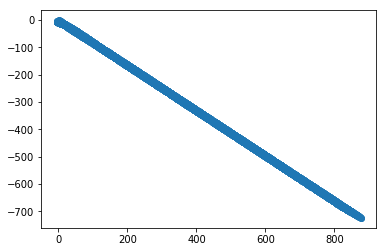

19400
Iterations: 19400	 Discriminator loss: 92.6016	 Generator loss: 51.9922


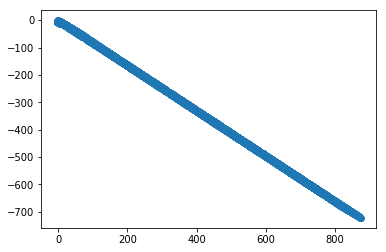

19500
Iterations: 19500	 Discriminator loss: 92.4015	 Generator loss: 52.0521


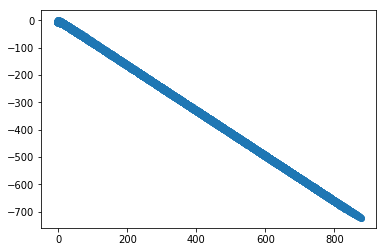

19600
Iterations: 19600	 Discriminator loss: 92.3454	 Generator loss: 52.5249


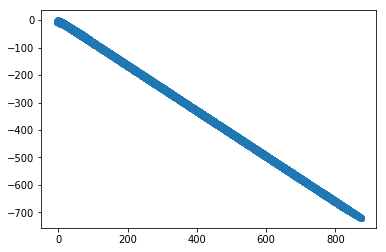

19700
Iterations: 19700	 Discriminator loss: 92.1769	 Generator loss: 52.0069


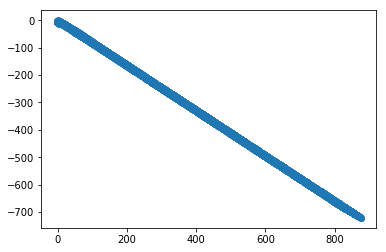

19800
Iterations: 19800	 Discriminator loss: 92.1512	 Generator loss: 51.5744


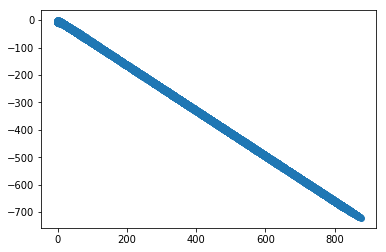

19900
Iterations: 19900	 Discriminator loss: 91.9975	 Generator loss: 51.4793


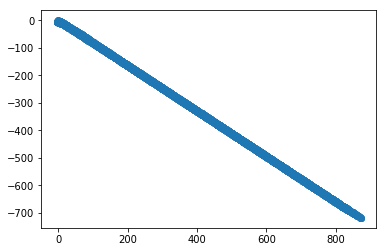

20000
Iterations: 20000	 Discriminator loss: 91.9030	 Generator loss: 51.7690


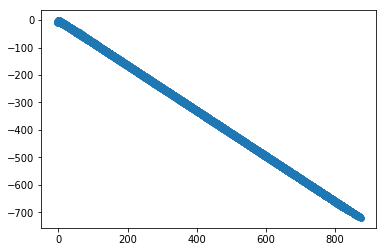

20100
Iterations: 20100	 Discriminator loss: 91.8285	 Generator loss: 52.0224


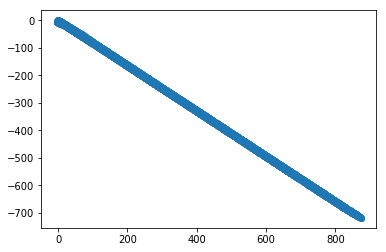

20200
Iterations: 20200	 Discriminator loss: 91.6854	 Generator loss: 52.2324


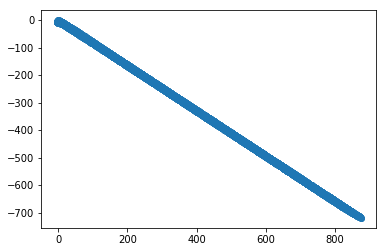

20300
Iterations: 20300	 Discriminator loss: 91.5714	 Generator loss: 51.5770


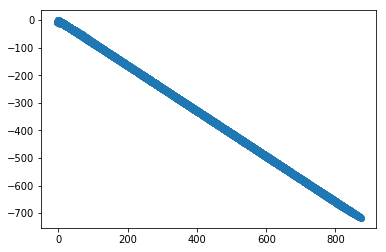

20400
Iterations: 20400	 Discriminator loss: 91.4242	 Generator loss: 51.8414


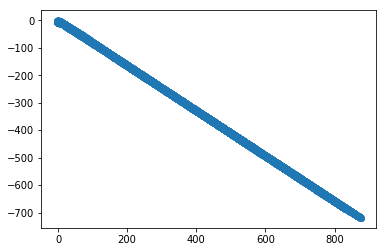

20500
Iterations: 20500	 Discriminator loss: 91.3529	 Generator loss: 51.7866


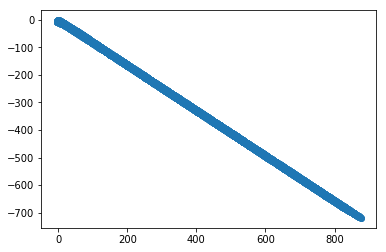

20600
Iterations: 20600	 Discriminator loss: 91.1924	 Generator loss: 51.7085


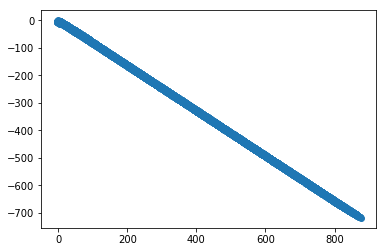

20700
Iterations: 20700	 Discriminator loss: 91.1453	 Generator loss: 51.9597


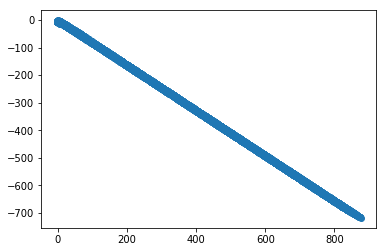

20800
Iterations: 20800	 Discriminator loss: 90.9775	 Generator loss: 51.6797


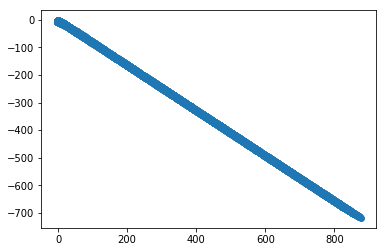

20900
Iterations: 20900	 Discriminator loss: 90.9147	 Generator loss: 51.2475


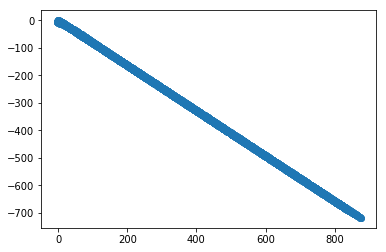

21000
Iterations: 21000	 Discriminator loss: 90.7717	 Generator loss: 51.7219


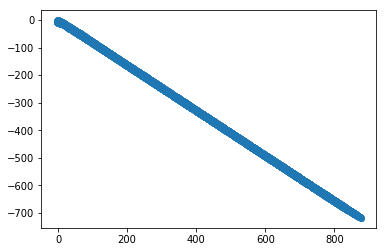

21100
Iterations: 21100	 Discriminator loss: 90.6866	 Generator loss: 51.4058


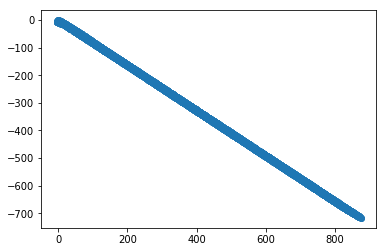

21200
Iterations: 21200	 Discriminator loss: 90.5109	 Generator loss: 51.3103


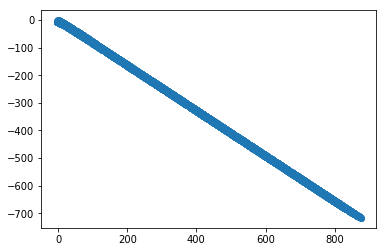

21300
Iterations: 21300	 Discriminator loss: 90.4025	 Generator loss: 51.1540


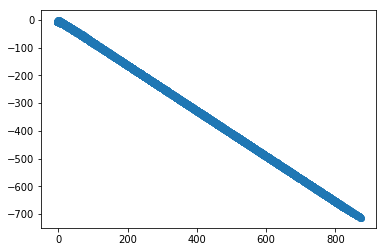

21400
Iterations: 21400	 Discriminator loss: 90.3119	 Generator loss: 51.4034


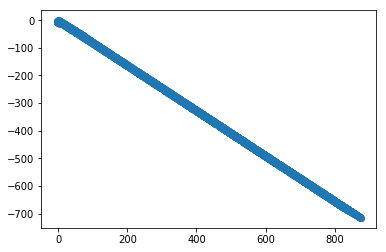

21500
Iterations: 21500	 Discriminator loss: 90.1318	 Generator loss: 51.7591


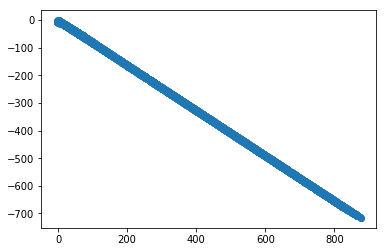

21600
Iterations: 21600	 Discriminator loss: 90.1918	 Generator loss: 51.1301


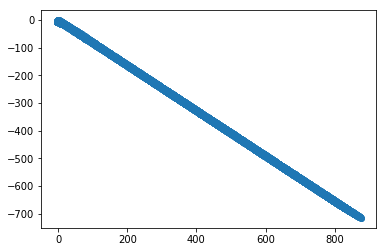

21700
Iterations: 21700	 Discriminator loss: 89.9350	 Generator loss: 50.9105


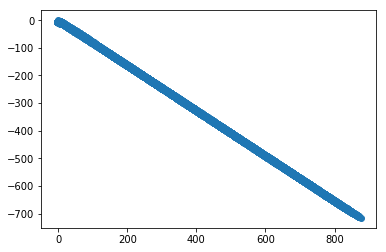

21800
Iterations: 21800	 Discriminator loss: 89.8798	 Generator loss: 51.0564


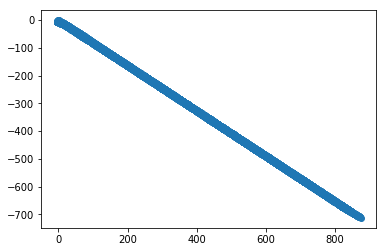

21900
Iterations: 21900	 Discriminator loss: 89.8043	 Generator loss: 50.9512


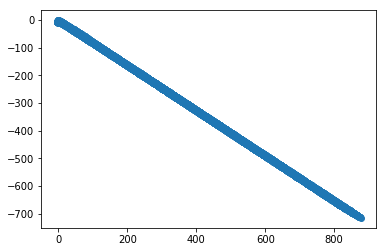

22000
Iterations: 22000	 Discriminator loss: 89.6117	 Generator loss: 51.1431


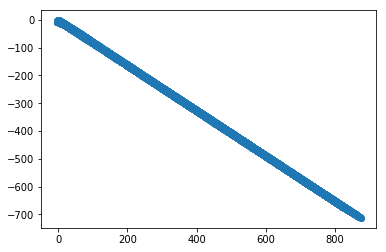

22100
Iterations: 22100	 Discriminator loss: 89.5072	 Generator loss: 51.5204


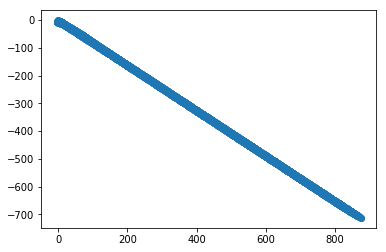

22200
Iterations: 22200	 Discriminator loss: 89.3468	 Generator loss: 51.2692


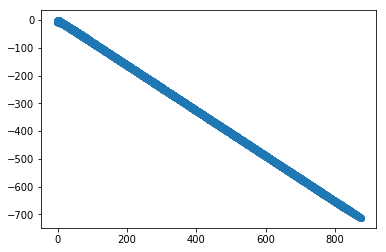

22300
Iterations: 22300	 Discriminator loss: 89.2629	 Generator loss: 51.1339


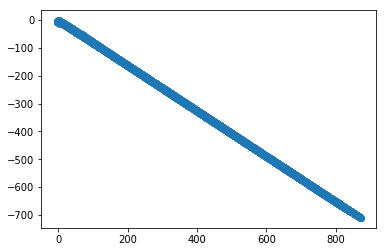

22400
Iterations: 22400	 Discriminator loss: 89.2434	 Generator loss: 50.7790


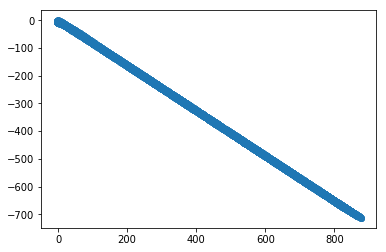

22500
Iterations: 22500	 Discriminator loss: 89.0355	 Generator loss: 51.4289


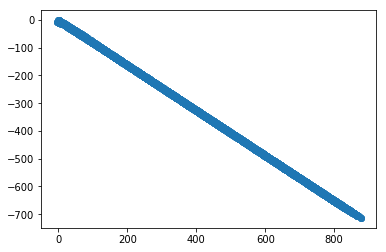

22600
Iterations: 22600	 Discriminator loss: 88.8542	 Generator loss: 51.0507


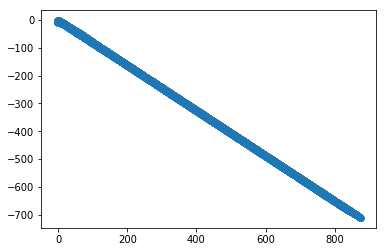

22700
Iterations: 22700	 Discriminator loss: 88.7387	 Generator loss: 50.8558


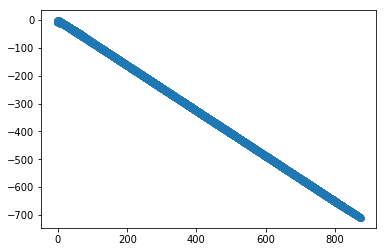

22800
Iterations: 22800	 Discriminator loss: 88.7167	 Generator loss: 50.7801


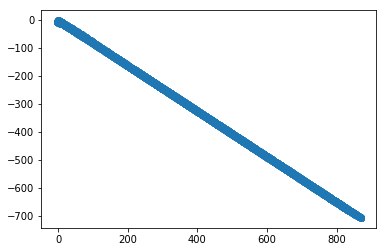

22900
Iterations: 22900	 Discriminator loss: 88.5569	 Generator loss: 51.1622


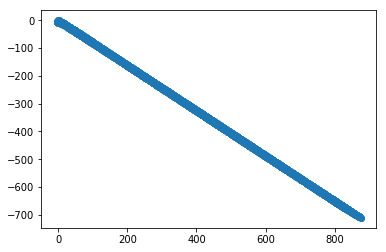

23000
Iterations: 23000	 Discriminator loss: 88.4970	 Generator loss: 50.7860


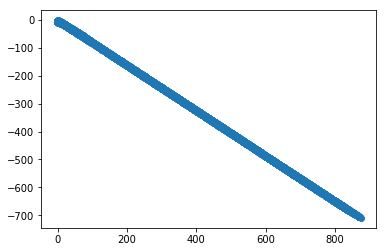

23100
Iterations: 23100	 Discriminator loss: 88.3306	 Generator loss: 51.1990


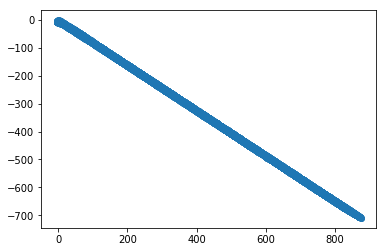

23200
Iterations: 23200	 Discriminator loss: 88.3042	 Generator loss: 51.4898


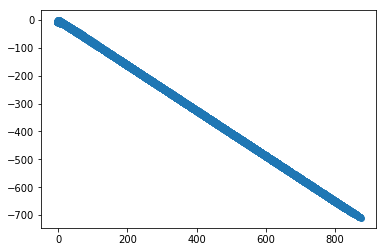

23300
Iterations: 23300	 Discriminator loss: 88.2570	 Generator loss: 50.6316


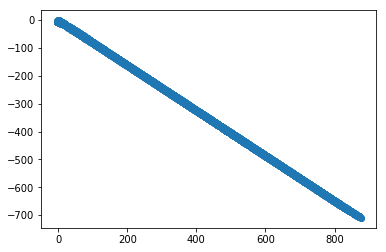

23400
Iterations: 23400	 Discriminator loss: 88.0175	 Generator loss: 50.4482


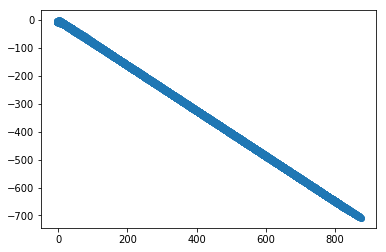

23500
Iterations: 23500	 Discriminator loss: 87.9406	 Generator loss: 50.6442


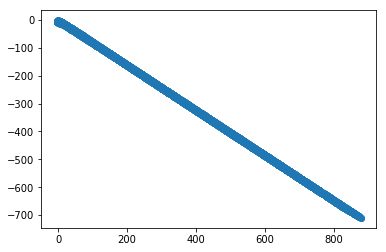

23600
Iterations: 23600	 Discriminator loss: 87.8580	 Generator loss: 50.7346


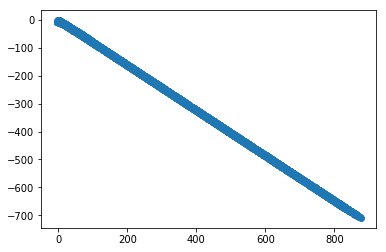

23700
Iterations: 23700	 Discriminator loss: 87.7204	 Generator loss: 50.3551


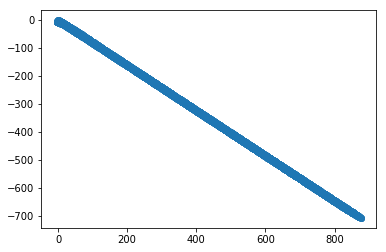

23800
Iterations: 23800	 Discriminator loss: 87.5152	 Generator loss: 50.7574


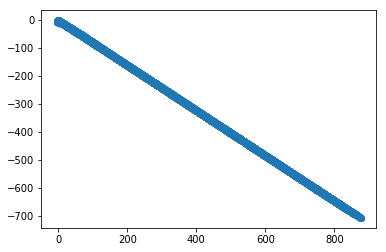

23900
Iterations: 23900	 Discriminator loss: 87.4812	 Generator loss: 50.5890


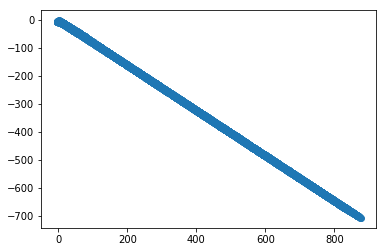

24000
Iterations: 24000	 Discriminator loss: 87.3668	 Generator loss: 50.0297


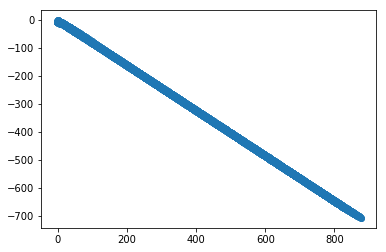

24100
Iterations: 24100	 Discriminator loss: 87.2100	 Generator loss: 50.5821


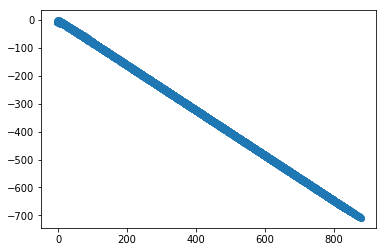

24200
Iterations: 24200	 Discriminator loss: 87.0409	 Generator loss: 49.8752


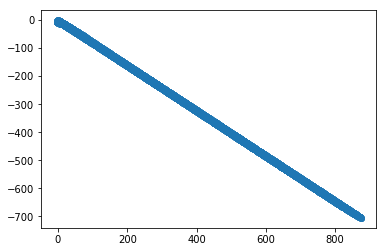

24300
Iterations: 24300	 Discriminator loss: 87.0472	 Generator loss: 50.5912


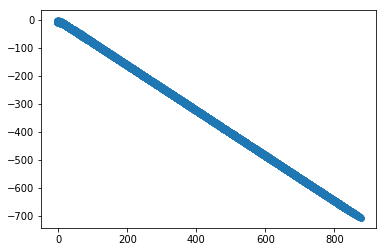

24400
Iterations: 24400	 Discriminator loss: 86.8375	 Generator loss: 50.3019


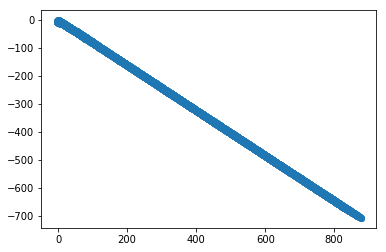

24500
Iterations: 24500	 Discriminator loss: 86.7160	 Generator loss: 50.6121


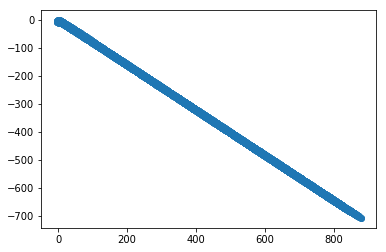

24600
Iterations: 24600	 Discriminator loss: 86.6156	 Generator loss: 50.4101


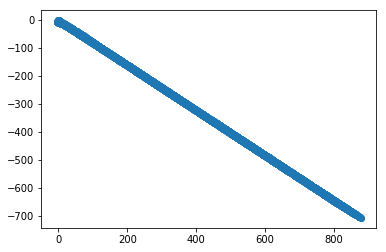

24700
Iterations: 24700	 Discriminator loss: 86.4629	 Generator loss: 50.1444


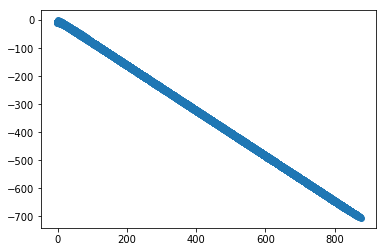

24800
Iterations: 24800	 Discriminator loss: 86.4049	 Generator loss: 50.1373


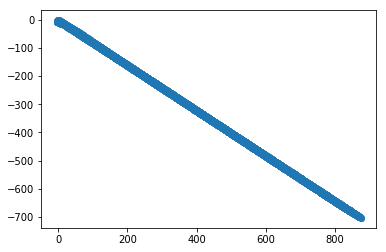

24900
Iterations: 24900	 Discriminator loss: 86.3342	 Generator loss: 50.2650


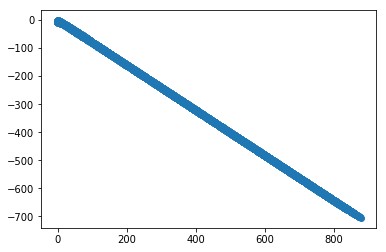

25000
Iterations: 25000	 Discriminator loss: 86.1224	 Generator loss: 49.7506


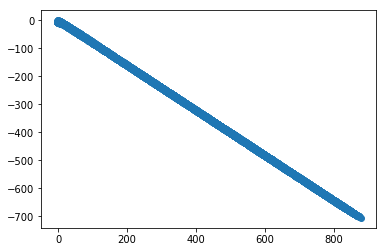

25100
Iterations: 25100	 Discriminator loss: 86.1230	 Generator loss: 50.3014


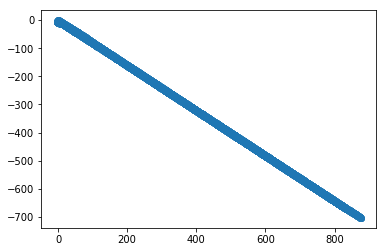

25200
Iterations: 25200	 Discriminator loss: 85.8840	 Generator loss: 49.7029


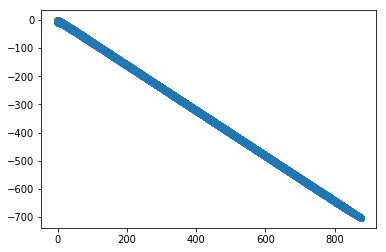

25300
Iterations: 25300	 Discriminator loss: 85.8580	 Generator loss: 49.8197


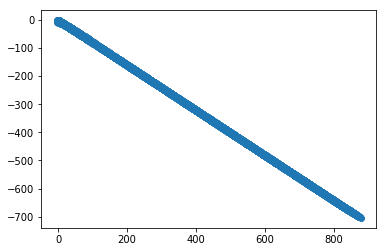

25400
Iterations: 25400	 Discriminator loss: 85.7729	 Generator loss: 49.8174


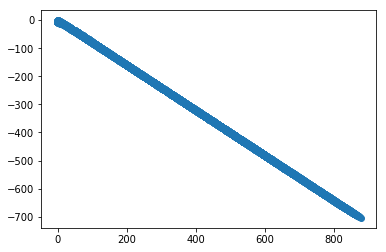

25500
Iterations: 25500	 Discriminator loss: 85.6206	 Generator loss: 49.6710


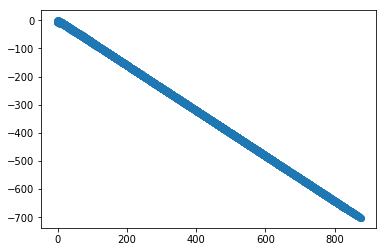

25600
Iterations: 25600	 Discriminator loss: 85.4802	 Generator loss: 49.4961


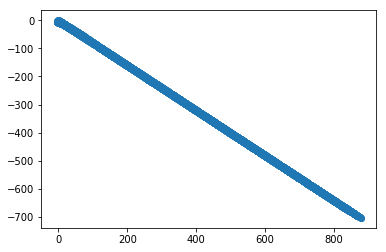

25700
Iterations: 25700	 Discriminator loss: 85.4076	 Generator loss: 49.6123


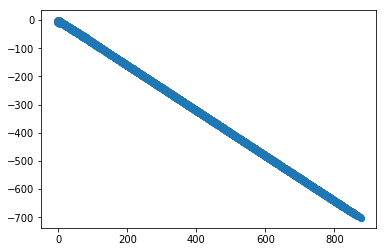

25800
Iterations: 25800	 Discriminator loss: 85.2625	 Generator loss: 49.5331


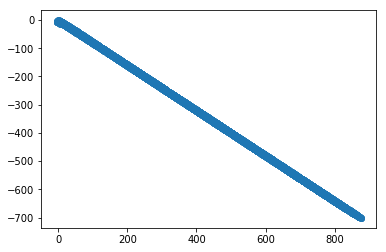

25900
Iterations: 25900	 Discriminator loss: 85.1483	 Generator loss: 49.4487


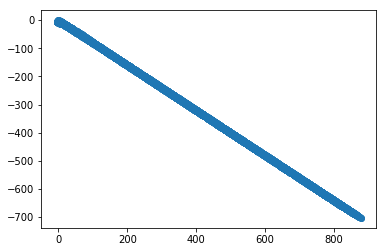

26000
Iterations: 26000	 Discriminator loss: 84.9577	 Generator loss: 50.0407


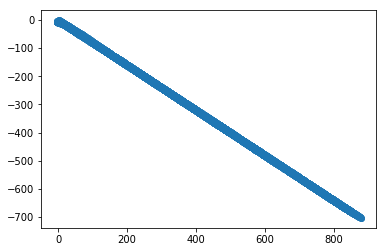

26100
Iterations: 26100	 Discriminator loss: 84.9212	 Generator loss: 49.7434


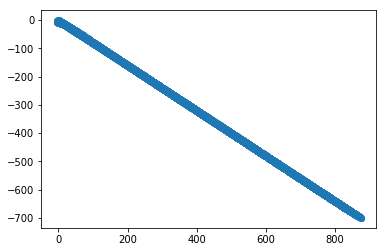

26200
Iterations: 26200	 Discriminator loss: 84.7968	 Generator loss: 49.4465


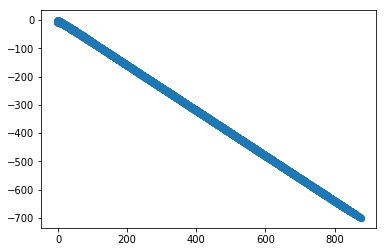

26300
Iterations: 26300	 Discriminator loss: 84.6413	 Generator loss: 49.2520


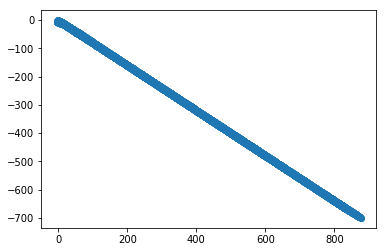

26400
Iterations: 26400	 Discriminator loss: 84.6038	 Generator loss: 49.7014


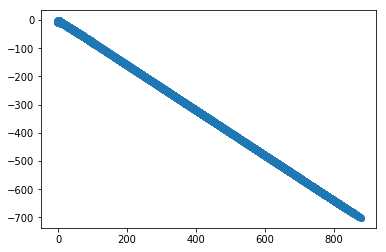

26500
Iterations: 26500	 Discriminator loss: 84.3955	 Generator loss: 49.8560


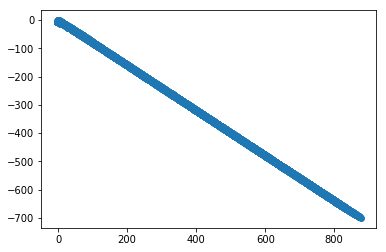

26600
Iterations: 26600	 Discriminator loss: 84.3454	 Generator loss: 49.2034


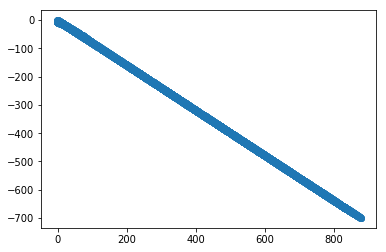

26700
Iterations: 26700	 Discriminator loss: 84.1751	 Generator loss: 48.9147


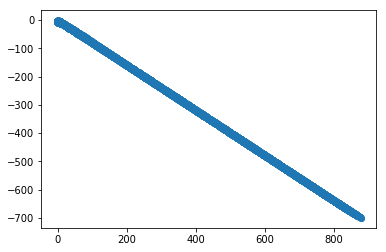

26800
Iterations: 26800	 Discriminator loss: 84.1222	 Generator loss: 49.4555


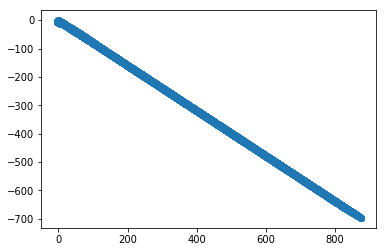

26900
Iterations: 26900	 Discriminator loss: 83.9853	 Generator loss: 49.4983


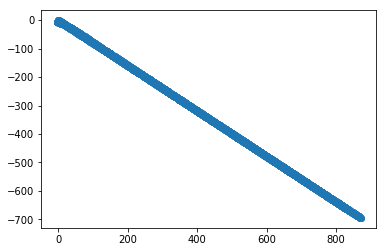

27000
Iterations: 27000	 Discriminator loss: 83.9163	 Generator loss: 49.5470


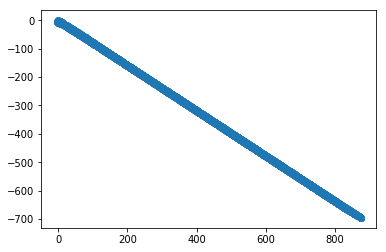

27100
Iterations: 27100	 Discriminator loss: 83.6913	 Generator loss: 48.5783


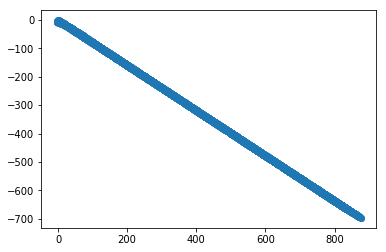

27200
Iterations: 27200	 Discriminator loss: 83.6256	 Generator loss: 49.0639


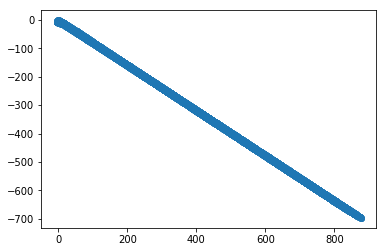

27300
Iterations: 27300	 Discriminator loss: 83.4891	 Generator loss: 49.1546


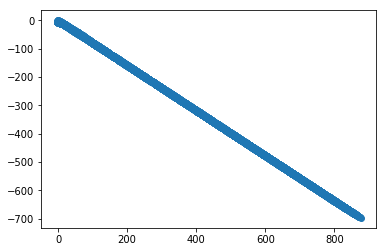

27400
Iterations: 27400	 Discriminator loss: 83.4826	 Generator loss: 49.2489


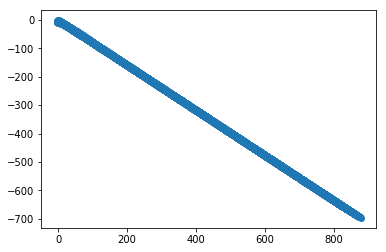

27500
Iterations: 27500	 Discriminator loss: 83.3517	 Generator loss: 49.1184


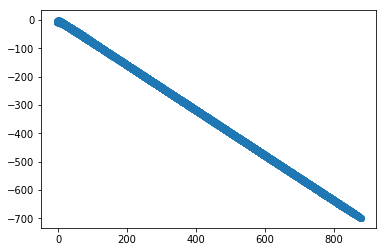

27600
Iterations: 27600	 Discriminator loss: 83.2208	 Generator loss: 49.8211


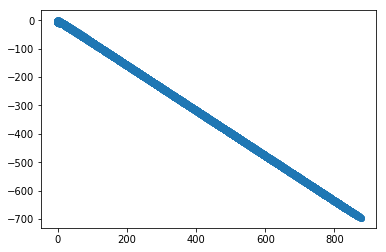

27700
Iterations: 27700	 Discriminator loss: 83.0706	 Generator loss: 49.1360


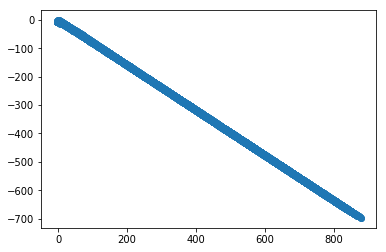

27800
Iterations: 27800	 Discriminator loss: 82.9183	 Generator loss: 48.8571


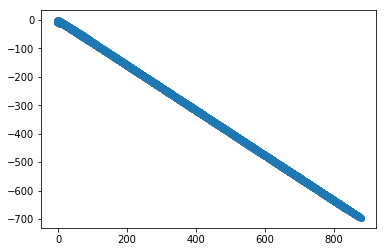

27900
Iterations: 27900	 Discriminator loss: 82.8837	 Generator loss: 49.2430


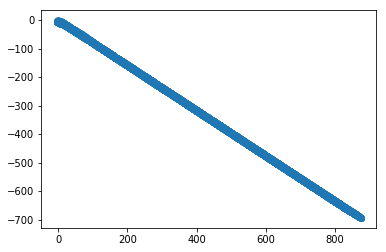

28000
Iterations: 28000	 Discriminator loss: 82.7756	 Generator loss: 48.9812


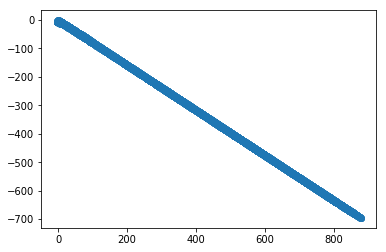

28100
Iterations: 28100	 Discriminator loss: 82.6099	 Generator loss: 48.6926


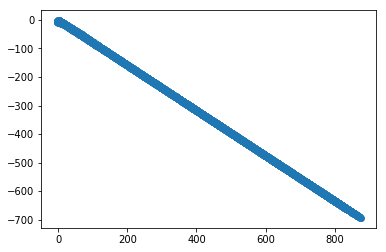

28200
Iterations: 28200	 Discriminator loss: 82.5531	 Generator loss: 48.6641


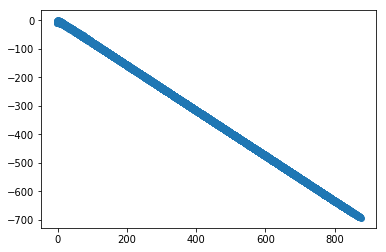

28300
Iterations: 28300	 Discriminator loss: 82.3987	 Generator loss: 48.7076


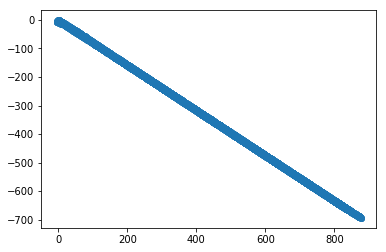

28400
Iterations: 28400	 Discriminator loss: 82.3306	 Generator loss: 49.1332


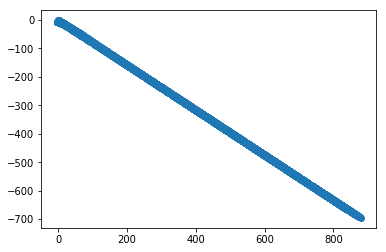

28500
Iterations: 28500	 Discriminator loss: 82.1698	 Generator loss: 48.4802


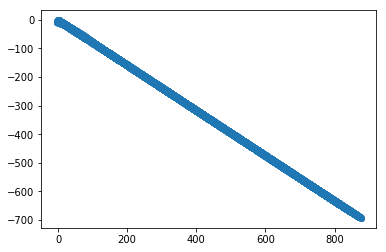

28600
Iterations: 28600	 Discriminator loss: 82.0149	 Generator loss: 48.5183


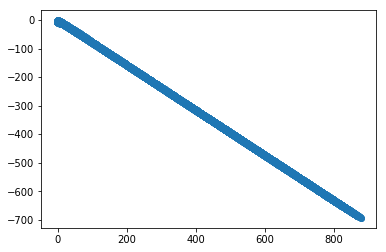

28700
Iterations: 28700	 Discriminator loss: 81.8678	 Generator loss: 48.4859


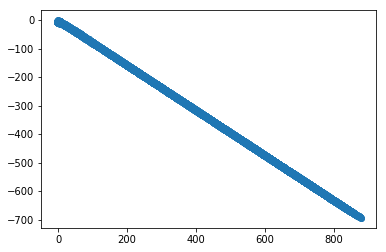

28800
Iterations: 28800	 Discriminator loss: 81.8014	 Generator loss: 48.5768


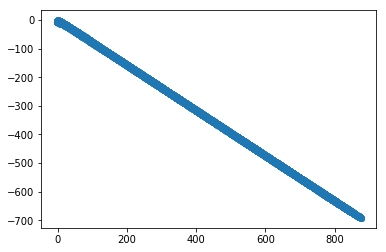

28900
Iterations: 28900	 Discriminator loss: 81.7017	 Generator loss: 48.7315


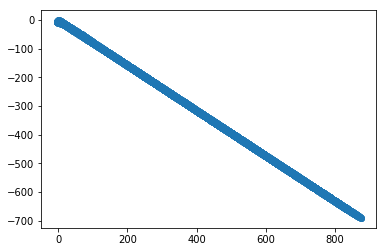

29000
Iterations: 29000	 Discriminator loss: 81.5882	 Generator loss: 48.2656


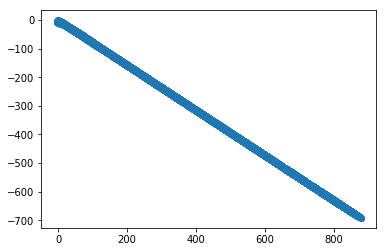

29100
Iterations: 29100	 Discriminator loss: 81.4709	 Generator loss: 48.4590


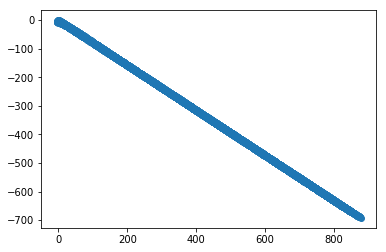

29200
Iterations: 29200	 Discriminator loss: 81.3574	 Generator loss: 48.1529


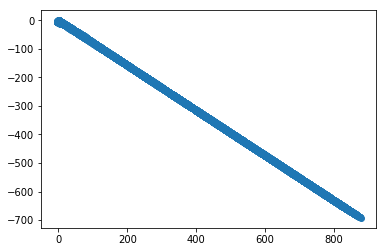

29300
Iterations: 29300	 Discriminator loss: 81.1980	 Generator loss: 48.5923


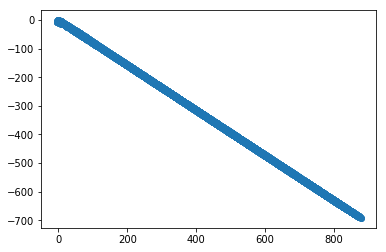

29400
Iterations: 29400	 Discriminator loss: 81.1419	 Generator loss: 48.2807


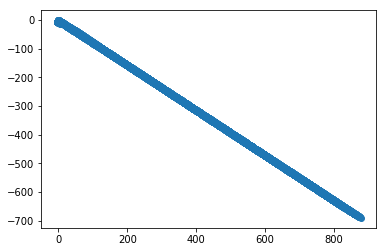

29500
Iterations: 29500	 Discriminator loss: 81.1040	 Generator loss: 47.9288


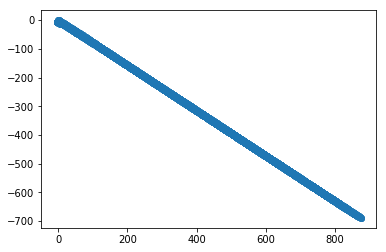

29600
Iterations: 29600	 Discriminator loss: 80.9065	 Generator loss: 47.8008


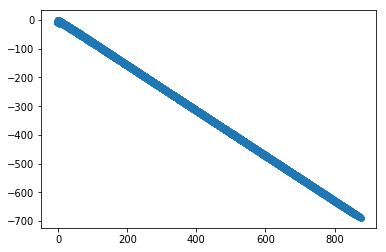

29700
Iterations: 29700	 Discriminator loss: 80.8469	 Generator loss: 48.1721


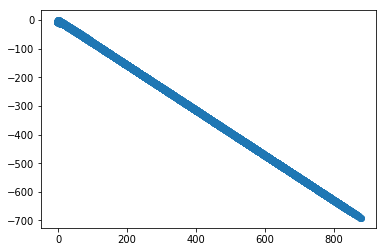

29800
Iterations: 29800	 Discriminator loss: 80.6169	 Generator loss: 47.8029


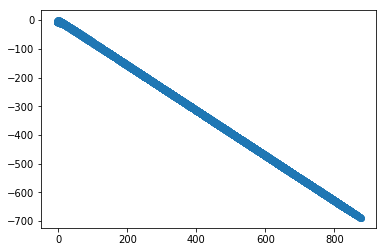

29900
Iterations: 29900	 Discriminator loss: 80.5610	 Generator loss: 48.1393


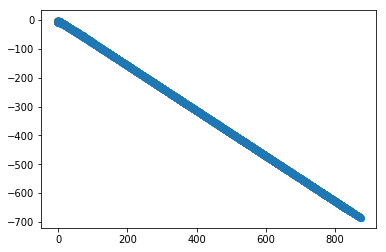

30000
Iterations: 30000	 Discriminator loss: 80.4235	 Generator loss: 48.1612


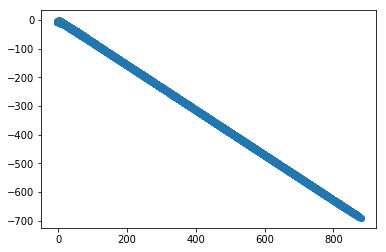

30100
Iterations: 30100	 Discriminator loss: 80.3501	 Generator loss: 48.4332


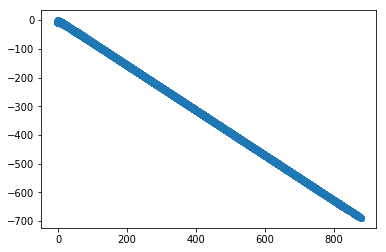

30200
Iterations: 30200	 Discriminator loss: 80.2785	 Generator loss: 47.7430


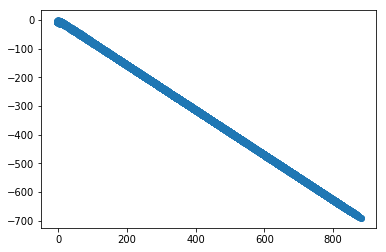

30300
Iterations: 30300	 Discriminator loss: 80.1022	 Generator loss: 47.7424


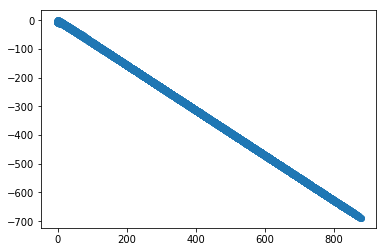

30400
Iterations: 30400	 Discriminator loss: 80.0434	 Generator loss: 47.9165


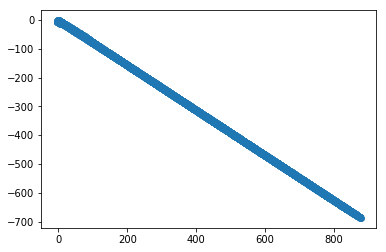

30500
Iterations: 30500	 Discriminator loss: 79.8797	 Generator loss: 47.4246


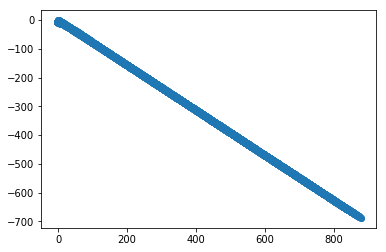

30600
Iterations: 30600	 Discriminator loss: 79.7439	 Generator loss: 48.2443


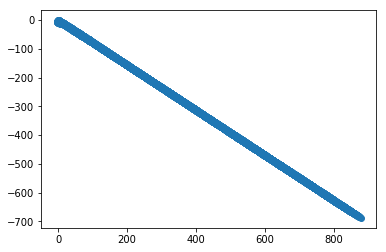

30700
Iterations: 30700	 Discriminator loss: 79.6314	 Generator loss: 47.6297


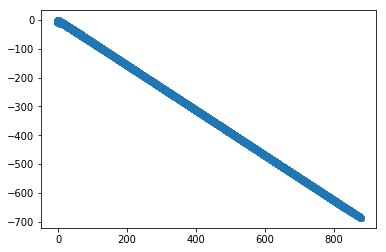

30800
Iterations: 30800	 Discriminator loss: 79.4987	 Generator loss: 47.4847


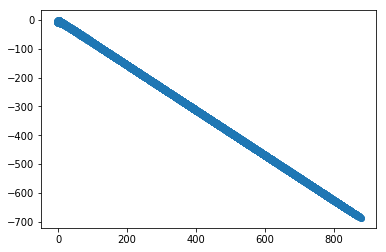

30900
Iterations: 30900	 Discriminator loss: 79.4007	 Generator loss: 48.0800


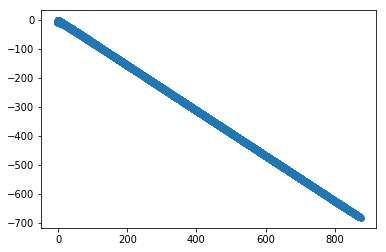

31000
Iterations: 31000	 Discriminator loss: 79.3357	 Generator loss: 47.7188


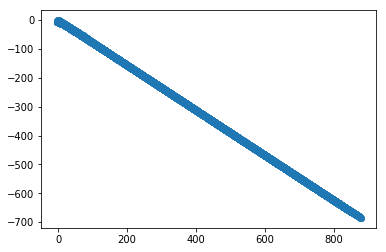

31100
Iterations: 31100	 Discriminator loss: 79.1168	 Generator loss: 47.7524


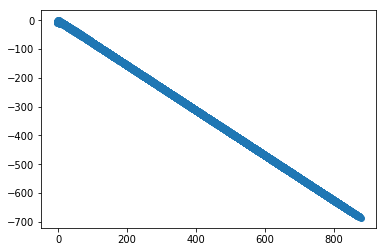

31200
Iterations: 31200	 Discriminator loss: 79.0666	 Generator loss: 47.4783


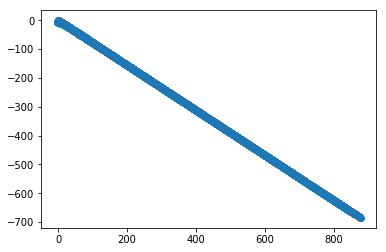

31300
Iterations: 31300	 Discriminator loss: 79.0102	 Generator loss: 47.3938


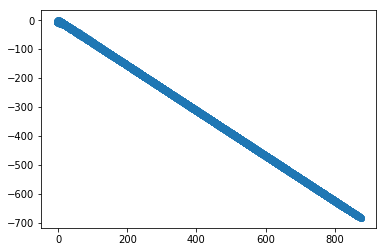

31400
Iterations: 31400	 Discriminator loss: 78.8230	 Generator loss: 47.1493


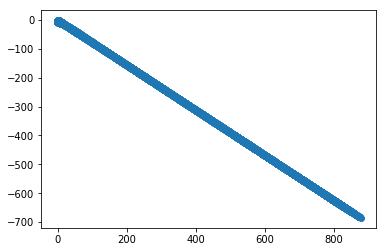

31500
Iterations: 31500	 Discriminator loss: 78.6964	 Generator loss: 47.1362


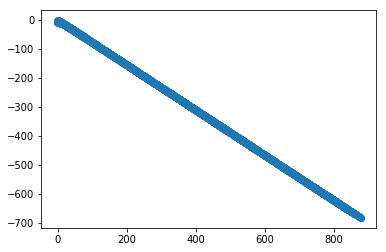

31600
Iterations: 31600	 Discriminator loss: 78.5910	 Generator loss: 47.5239


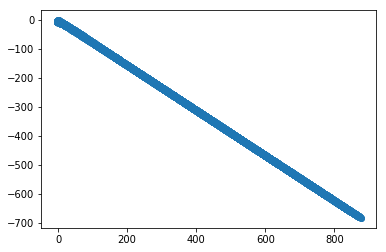

31700
Iterations: 31700	 Discriminator loss: 78.5923	 Generator loss: 46.8071


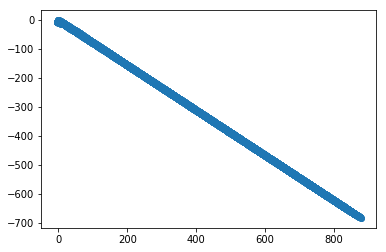

31800
Iterations: 31800	 Discriminator loss: 78.3990	 Generator loss: 47.6670


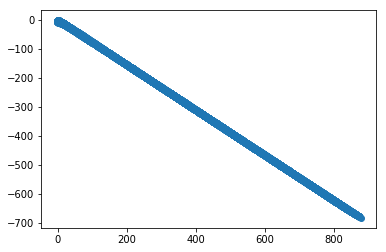

31900
Iterations: 31900	 Discriminator loss: 78.2341	 Generator loss: 47.3538


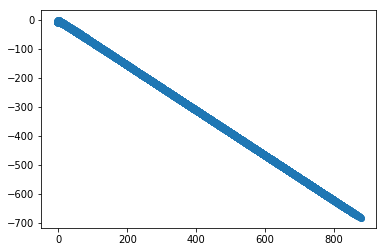

32000
Iterations: 32000	 Discriminator loss: 78.0949	 Generator loss: 46.7727


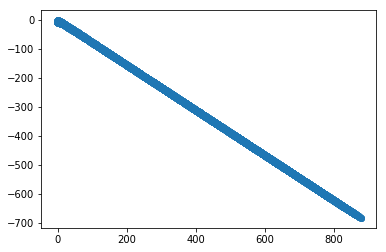

32100
Iterations: 32100	 Discriminator loss: 78.0511	 Generator loss: 46.6265


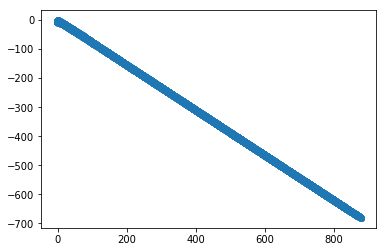

32200
Iterations: 32200	 Discriminator loss: 77.9119	 Generator loss: 47.0549


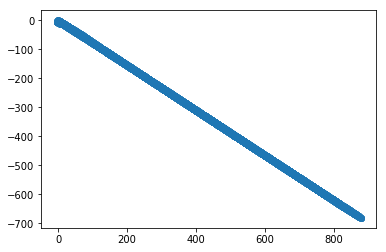

32300
Iterations: 32300	 Discriminator loss: 77.8076	 Generator loss: 47.1324


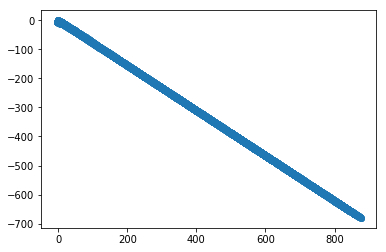

32400
Iterations: 32400	 Discriminator loss: 77.6449	 Generator loss: 47.1113


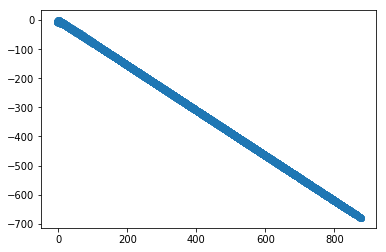

32500
Iterations: 32500	 Discriminator loss: 77.5846	 Generator loss: 47.1513


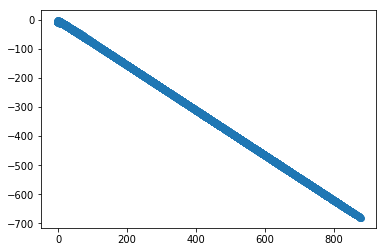

32600
Iterations: 32600	 Discriminator loss: 77.4792	 Generator loss: 47.1283


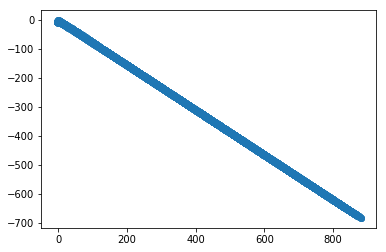

32700
Iterations: 32700	 Discriminator loss: 77.3701	 Generator loss: 46.9609


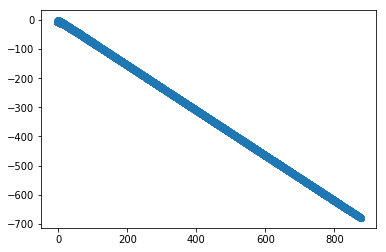

32800
Iterations: 32800	 Discriminator loss: 77.2209	 Generator loss: 46.4476


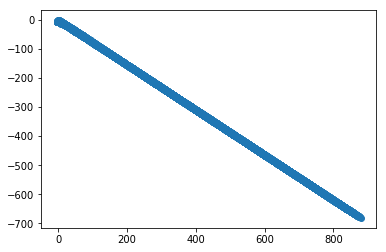

32900
Iterations: 32900	 Discriminator loss: 77.1352	 Generator loss: 46.8016


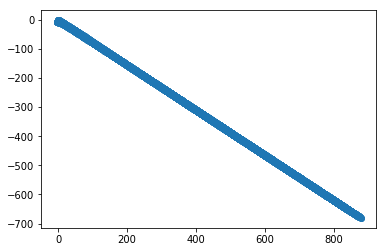

33000
Iterations: 33000	 Discriminator loss: 76.9757	 Generator loss: 46.8331


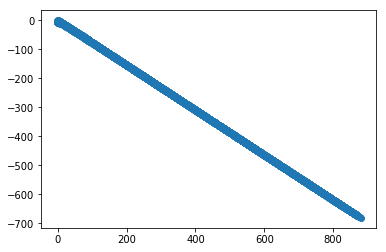

33100
Iterations: 33100	 Discriminator loss: 76.9450	 Generator loss: 46.5127


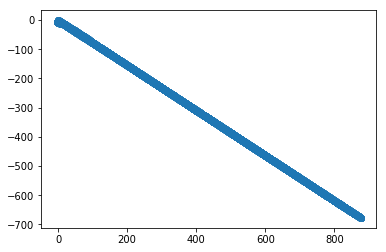

33200
Iterations: 33200	 Discriminator loss: 76.8186	 Generator loss: 46.5088


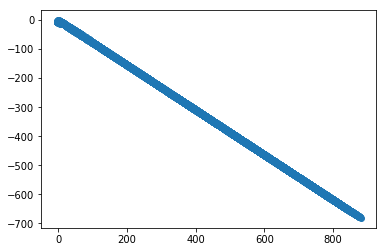

33300
Iterations: 33300	 Discriminator loss: 76.7145	 Generator loss: 46.8488


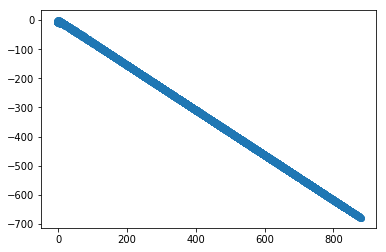

33400
Iterations: 33400	 Discriminator loss: 76.5878	 Generator loss: 46.5105


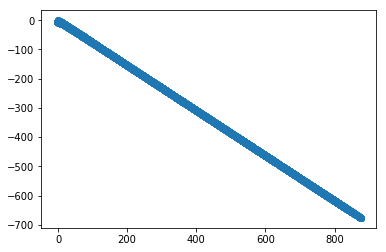

33500
Iterations: 33500	 Discriminator loss: 76.4479	 Generator loss: 46.4802


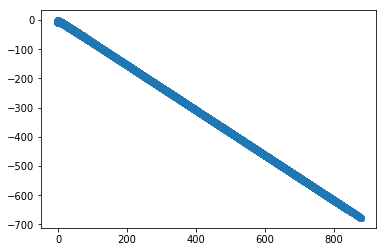

33600
Iterations: 33600	 Discriminator loss: 76.3102	 Generator loss: 46.3813


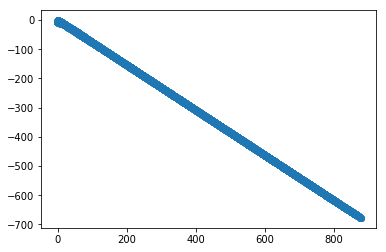

33700
Iterations: 33700	 Discriminator loss: 76.2064	 Generator loss: 46.2553


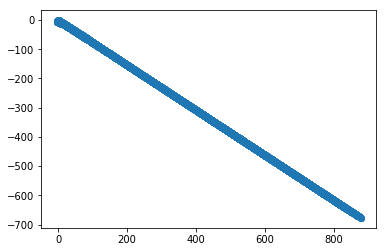

33800
Iterations: 33800	 Discriminator loss: 76.0774	 Generator loss: 46.1140


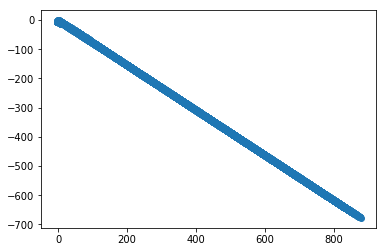

33900
Iterations: 33900	 Discriminator loss: 75.9644	 Generator loss: 46.7195


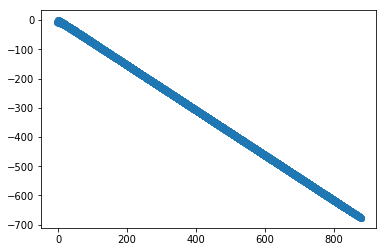

34000
Iterations: 34000	 Discriminator loss: 75.8657	 Generator loss: 46.6009


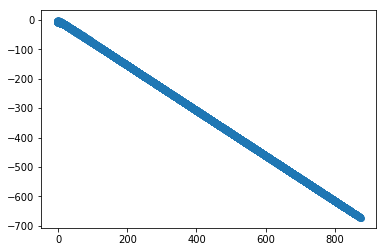

34100
Iterations: 34100	 Discriminator loss: 75.7956	 Generator loss: 46.3473


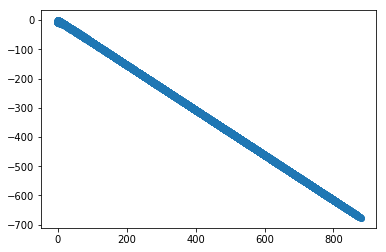

34200
Iterations: 34200	 Discriminator loss: 75.6056	 Generator loss: 46.3069


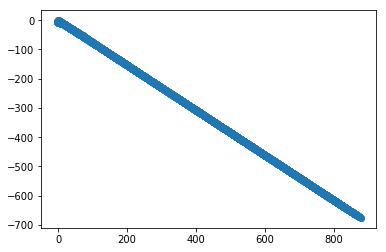

34300
Iterations: 34300	 Discriminator loss: 75.5540	 Generator loss: 46.0797


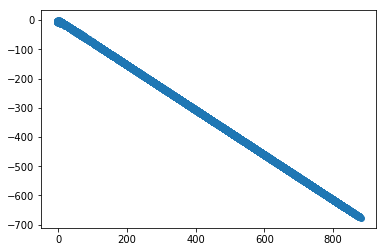

34400
Iterations: 34400	 Discriminator loss: 75.4013	 Generator loss: 46.3366


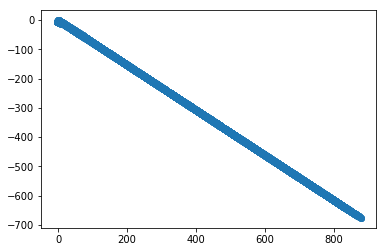

34500
Iterations: 34500	 Discriminator loss: 75.2723	 Generator loss: 45.9299


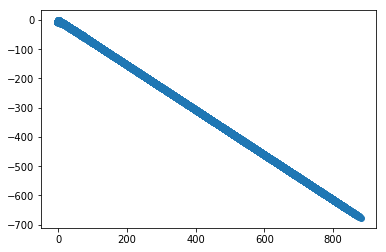

34600
Iterations: 34600	 Discriminator loss: 75.1658	 Generator loss: 45.8499


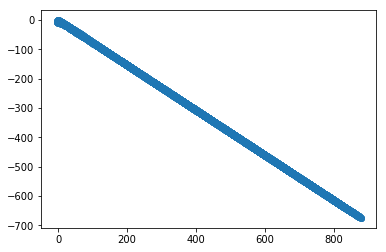

34700
Iterations: 34700	 Discriminator loss: 75.0283	 Generator loss: 46.2957


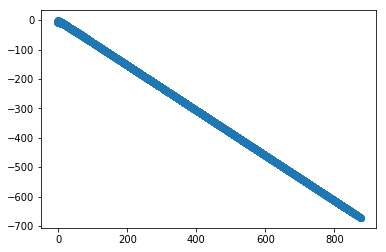

34800
Iterations: 34800	 Discriminator loss: 74.9118	 Generator loss: 46.0230


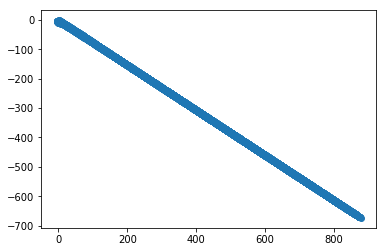

34900
Iterations: 34900	 Discriminator loss: 74.7753	 Generator loss: 46.0796


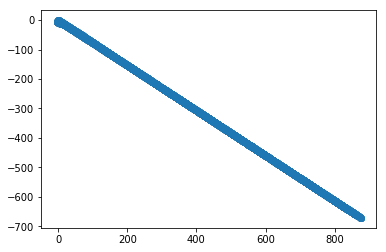

35000
Iterations: 35000	 Discriminator loss: 74.7376	 Generator loss: 45.7010


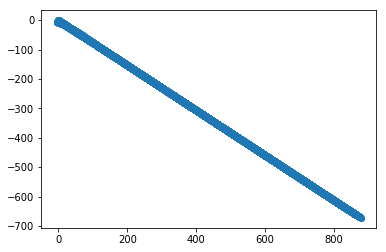

35100
Iterations: 35100	 Discriminator loss: 74.6346	 Generator loss: 45.6804


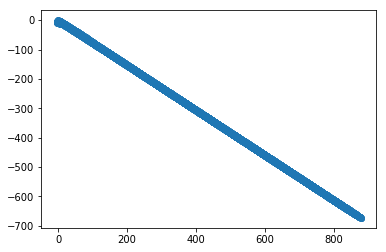

35200
Iterations: 35200	 Discriminator loss: 74.4583	 Generator loss: 45.7009


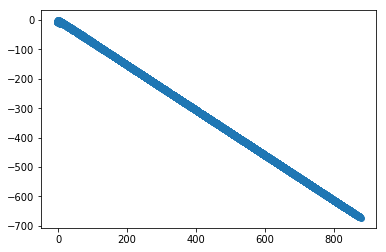

35300
Iterations: 35300	 Discriminator loss: 74.4381	 Generator loss: 45.1223


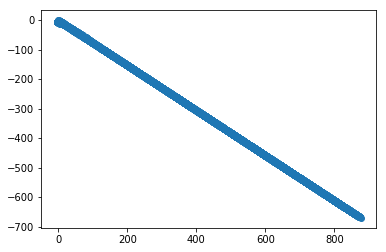

35400
Iterations: 35400	 Discriminator loss: 74.2493	 Generator loss: 46.3000


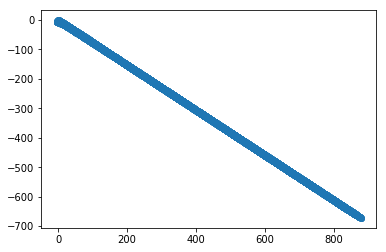

35500
Iterations: 35500	 Discriminator loss: 74.2026	 Generator loss: 45.9402


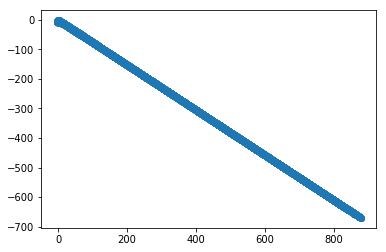

35600
Iterations: 35600	 Discriminator loss: 74.0622	 Generator loss: 45.7087


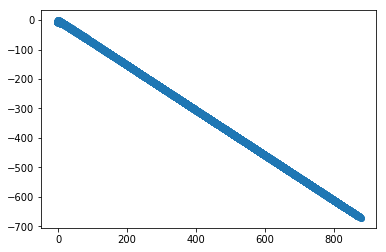

35700
Iterations: 35700	 Discriminator loss: 73.8740	 Generator loss: 45.6756


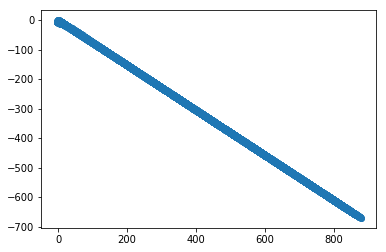

35800
Iterations: 35800	 Discriminator loss: 73.9044	 Generator loss: 45.1975


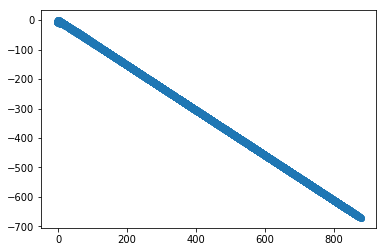

35900
Iterations: 35900	 Discriminator loss: 73.7386	 Generator loss: 45.4562


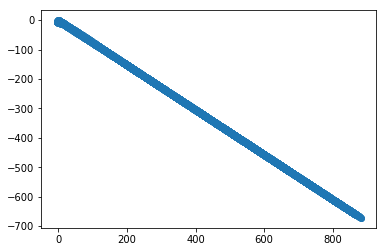

36000
Iterations: 36000	 Discriminator loss: 73.5055	 Generator loss: 45.6286


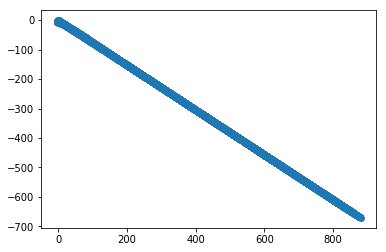

36100
Iterations: 36100	 Discriminator loss: 73.4532	 Generator loss: 45.0341


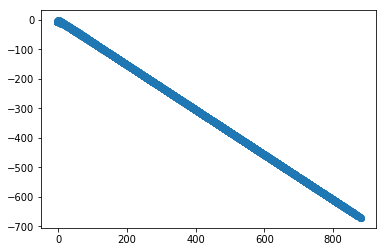

36200
Iterations: 36200	 Discriminator loss: 73.2993	 Generator loss: 45.1388


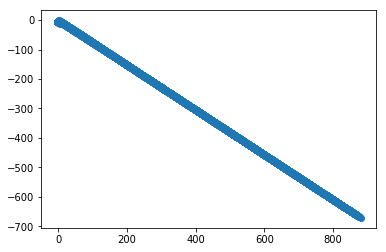

36300
Iterations: 36300	 Discriminator loss: 73.2327	 Generator loss: 45.5277


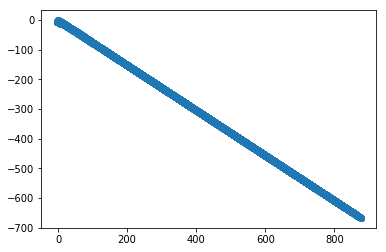

36400
Iterations: 36400	 Discriminator loss: 73.1257	 Generator loss: 45.3276


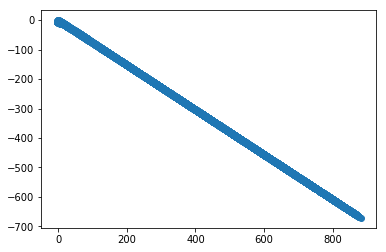

36500
Iterations: 36500	 Discriminator loss: 72.9503	 Generator loss: 45.0664


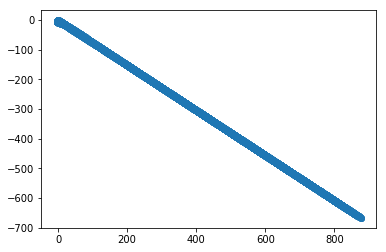

36600
Iterations: 36600	 Discriminator loss: 72.8827	 Generator loss: 45.5199


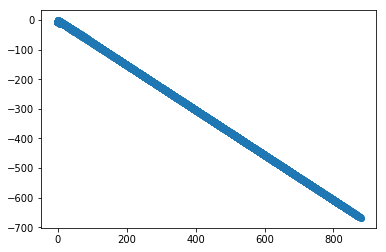

36700
Iterations: 36700	 Discriminator loss: 72.7519	 Generator loss: 44.8824


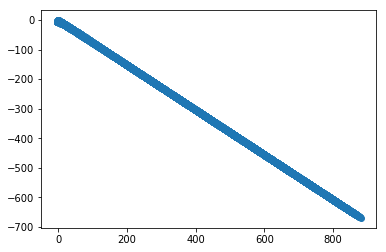

36800
Iterations: 36800	 Discriminator loss: 72.7290	 Generator loss: 44.8916


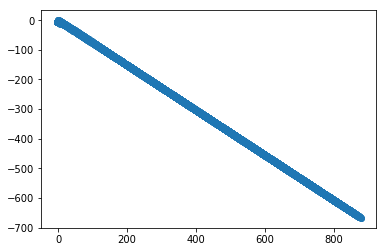

36900
Iterations: 36900	 Discriminator loss: 72.5358	 Generator loss: 45.3836


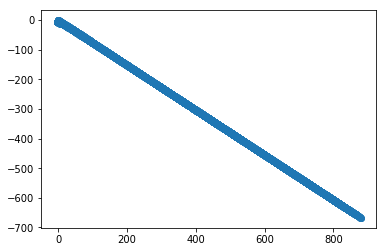

37000
Iterations: 37000	 Discriminator loss: 72.4377	 Generator loss: 45.2431


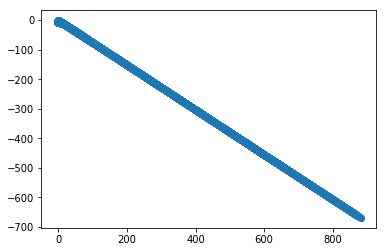

37100
Iterations: 37100	 Discriminator loss: 72.2861	 Generator loss: 44.9869


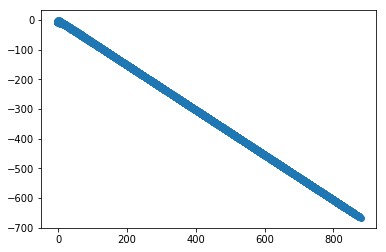

37200
Iterations: 37200	 Discriminator loss: 72.1787	 Generator loss: 45.0179


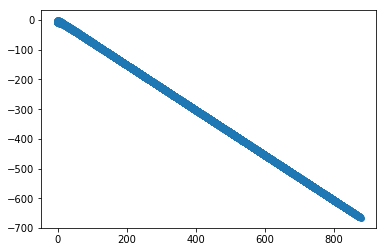

37300
Iterations: 37300	 Discriminator loss: 72.0736	 Generator loss: 44.9037


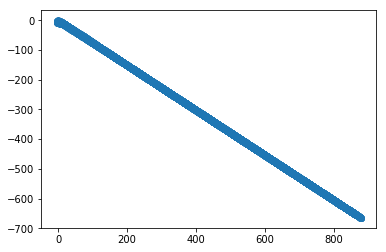

37400
Iterations: 37400	 Discriminator loss: 72.0353	 Generator loss: 45.1052


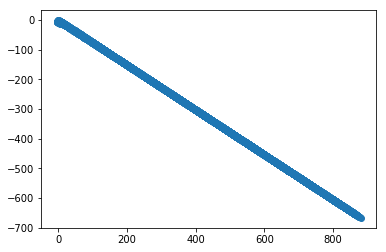

37500
Iterations: 37500	 Discriminator loss: 71.8388	 Generator loss: 44.6761


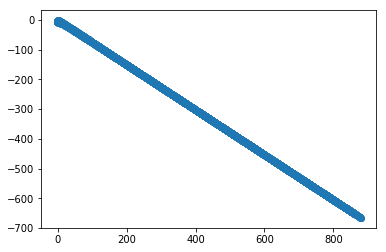

37600
Iterations: 37600	 Discriminator loss: 71.7539	 Generator loss: 45.0205


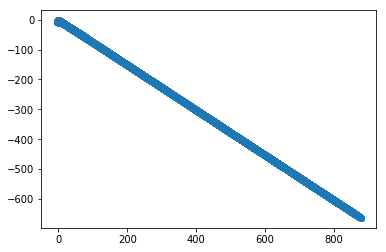

37700
Iterations: 37700	 Discriminator loss: 71.6897	 Generator loss: 44.5472


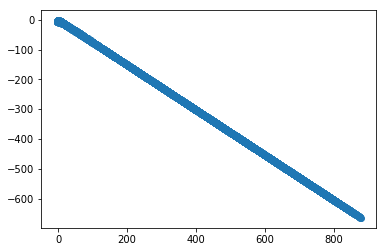

37800
Iterations: 37800	 Discriminator loss: 71.5079	 Generator loss: 44.5404


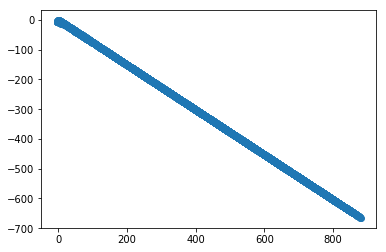

37900
Iterations: 37900	 Discriminator loss: 71.3600	 Generator loss: 44.4021


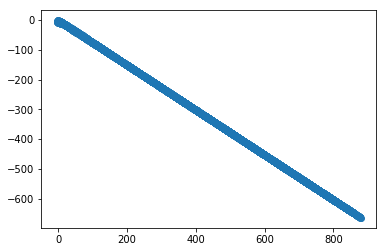

38000
Iterations: 38000	 Discriminator loss: 71.3213	 Generator loss: 44.3358


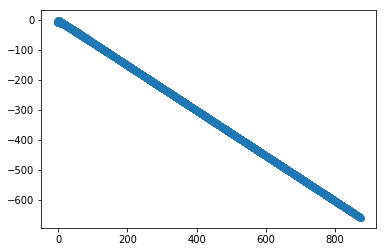

38100
Iterations: 38100	 Discriminator loss: 71.1822	 Generator loss: 44.2760


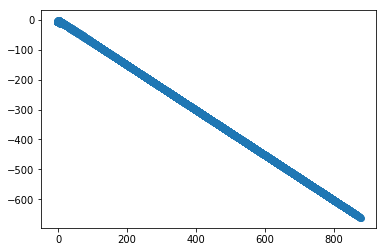

38200
Iterations: 38200	 Discriminator loss: 71.0837	 Generator loss: 44.4799


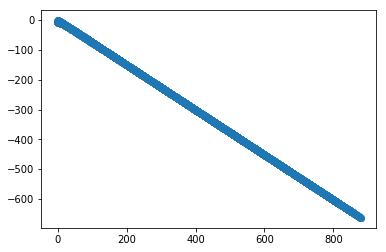

38300
Iterations: 38300	 Discriminator loss: 70.8868	 Generator loss: 44.0698


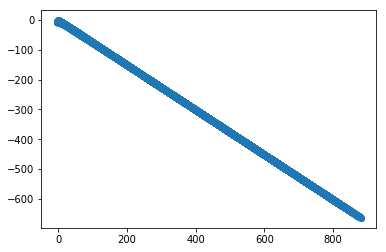

38400
Iterations: 38400	 Discriminator loss: 70.7847	 Generator loss: 44.0177


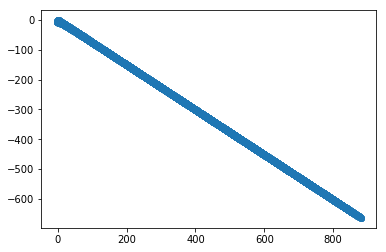

38500
Iterations: 38500	 Discriminator loss: 70.6759	 Generator loss: 44.7646


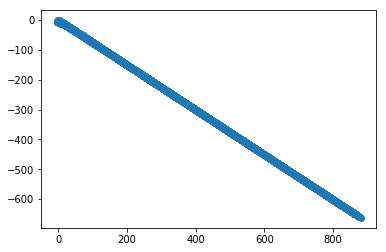

38600
Iterations: 38600	 Discriminator loss: 70.5426	 Generator loss: 44.3469


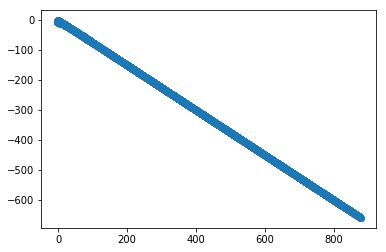

38700
Iterations: 38700	 Discriminator loss: 70.3990	 Generator loss: 43.9774


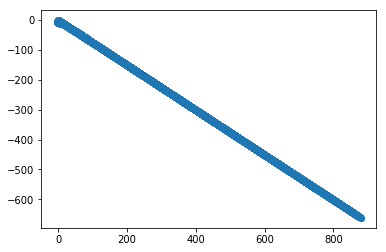

38800
Iterations: 38800	 Discriminator loss: 70.2767	 Generator loss: 43.9119


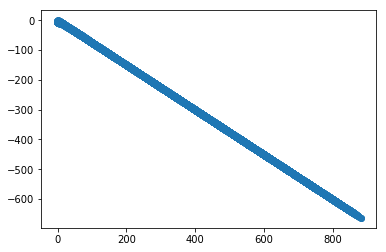

38900
Iterations: 38900	 Discriminator loss: 70.2252	 Generator loss: 43.3451


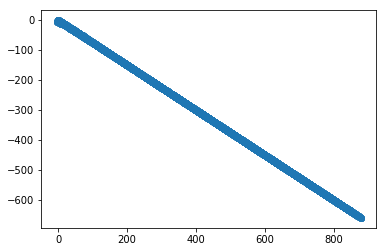

39000
Iterations: 39000	 Discriminator loss: 70.1606	 Generator loss: 44.0351


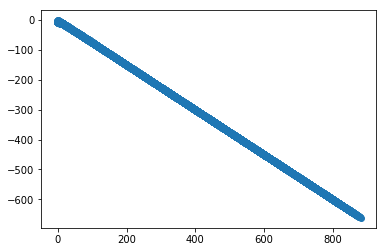

39100
Iterations: 39100	 Discriminator loss: 70.0710	 Generator loss: 44.0434


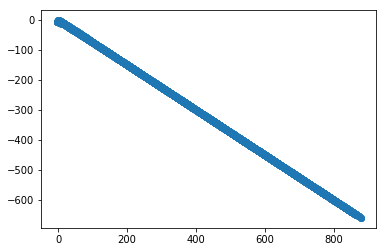

39200
Iterations: 39200	 Discriminator loss: 69.9001	 Generator loss: 43.8119


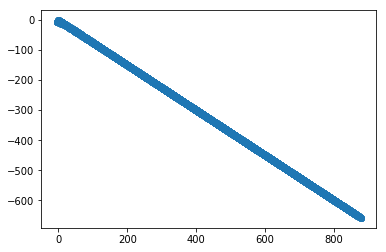

39300
Iterations: 39300	 Discriminator loss: 69.7358	 Generator loss: 44.3373


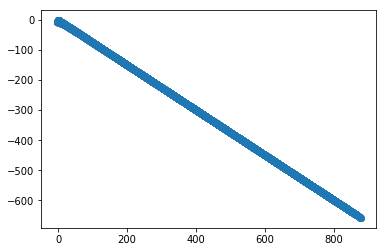

39400
Iterations: 39400	 Discriminator loss: 69.6650	 Generator loss: 44.0522


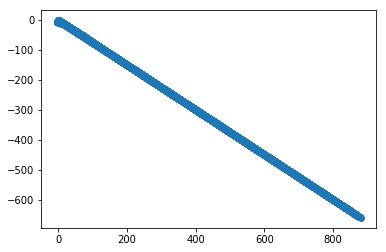

39500
Iterations: 39500	 Discriminator loss: 69.5644	 Generator loss: 43.8974


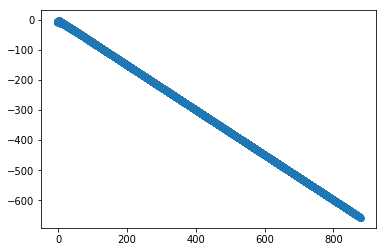

39600
Iterations: 39600	 Discriminator loss: 69.4311	 Generator loss: 44.1088


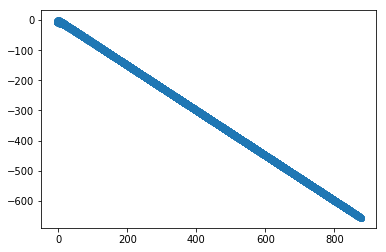

39700
Iterations: 39700	 Discriminator loss: 69.3291	 Generator loss: 43.6816


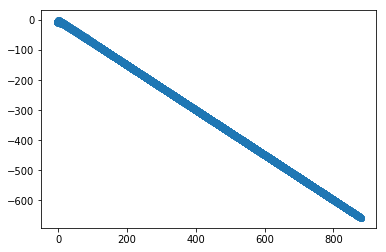

39800
Iterations: 39800	 Discriminator loss: 69.1846	 Generator loss: 43.3613


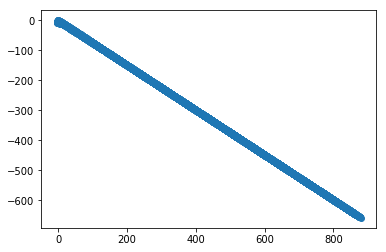

39900
Iterations: 39900	 Discriminator loss: 69.1510	 Generator loss: 43.9832


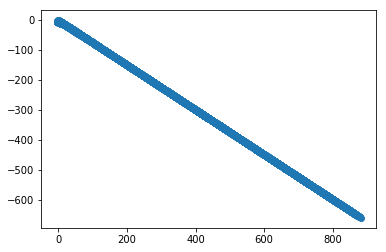

40000
Iterations: 40000	 Discriminator loss: 68.9855	 Generator loss: 43.6521


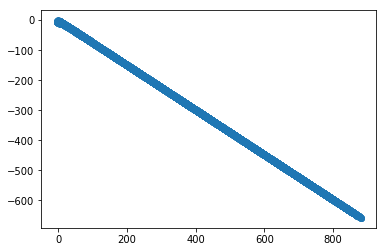

40100
Iterations: 40100	 Discriminator loss: 68.8585	 Generator loss: 43.7561


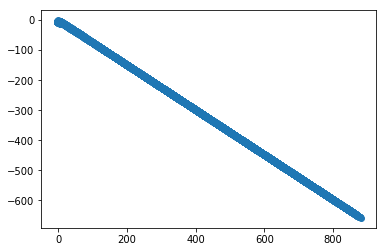

40200
Iterations: 40200	 Discriminator loss: 68.7683	 Generator loss: 43.6751


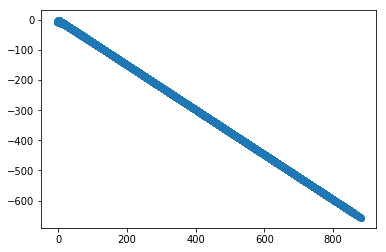

40300
Iterations: 40300	 Discriminator loss: 68.6537	 Generator loss: 43.6218


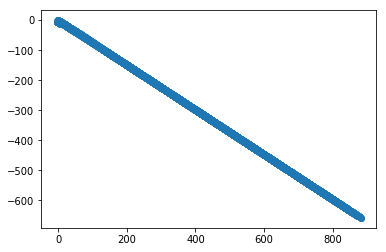

40400
Iterations: 40400	 Discriminator loss: 68.5535	 Generator loss: 43.4994


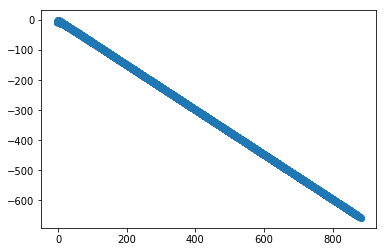

40500
Iterations: 40500	 Discriminator loss: 68.4748	 Generator loss: 43.2963


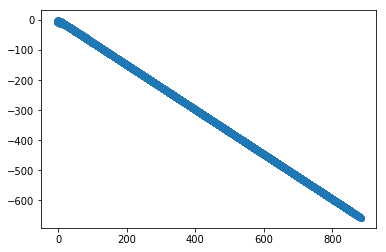

40600
Iterations: 40600	 Discriminator loss: 68.2905	 Generator loss: 43.0265


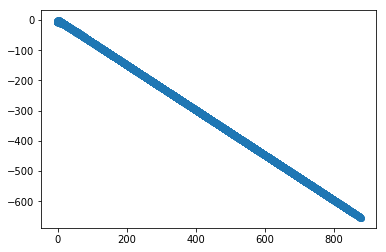

40700
Iterations: 40700	 Discriminator loss: 68.1554	 Generator loss: 43.3257


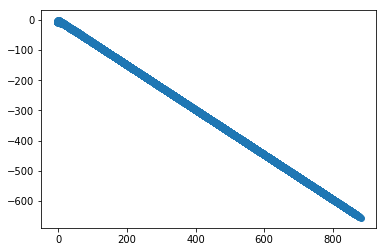

40800
Iterations: 40800	 Discriminator loss: 68.1160	 Generator loss: 43.0745


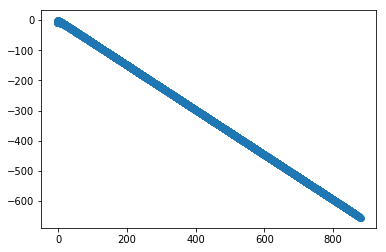

40900
Iterations: 40900	 Discriminator loss: 67.9574	 Generator loss: 43.5144


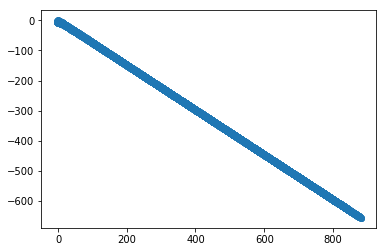

41000
Iterations: 41000	 Discriminator loss: 67.8384	 Generator loss: 43.2303


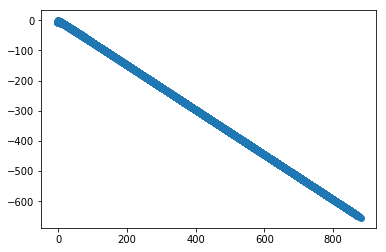

41100
Iterations: 41100	 Discriminator loss: 67.7120	 Generator loss: 43.4746


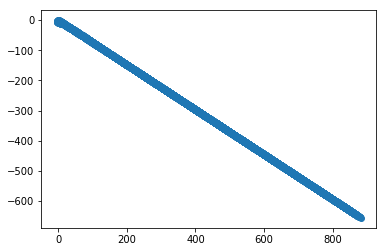

41200
Iterations: 41200	 Discriminator loss: 67.6480	 Generator loss: 43.4007


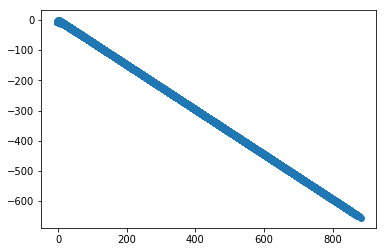

41300
Iterations: 41300	 Discriminator loss: 67.4930	 Generator loss: 43.3855


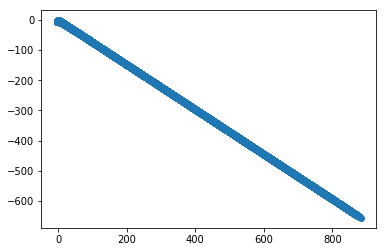

41400
Iterations: 41400	 Discriminator loss: 67.3978	 Generator loss: 43.3235


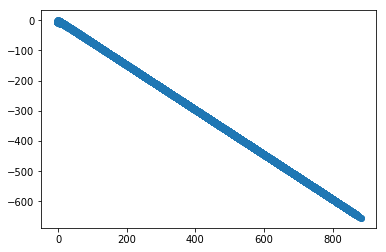

41500
Iterations: 41500	 Discriminator loss: 67.2875	 Generator loss: 42.5827


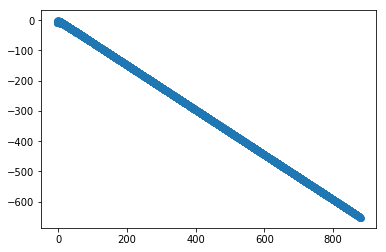

41600
Iterations: 41600	 Discriminator loss: 67.1611	 Generator loss: 43.0269


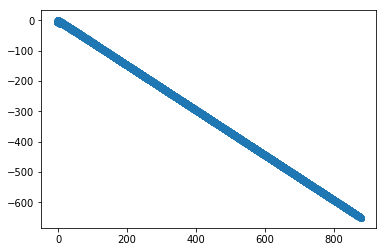

41700
Iterations: 41700	 Discriminator loss: 67.1115	 Generator loss: 42.7279


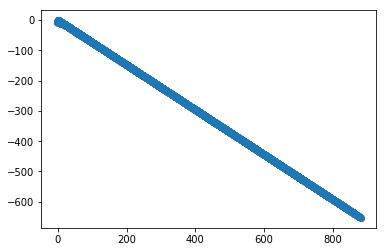

41800
Iterations: 41800	 Discriminator loss: 66.9654	 Generator loss: 42.9369


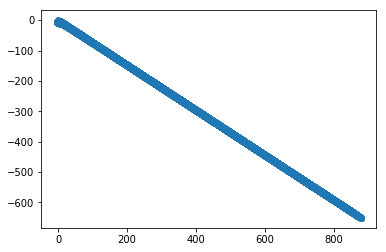

41900
Iterations: 41900	 Discriminator loss: 66.7841	 Generator loss: 43.2374


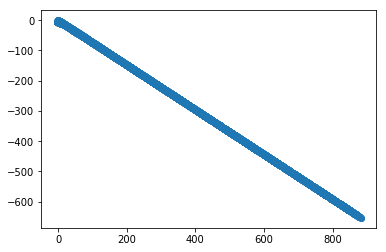

42000
Iterations: 42000	 Discriminator loss: 66.6566	 Generator loss: 42.6905


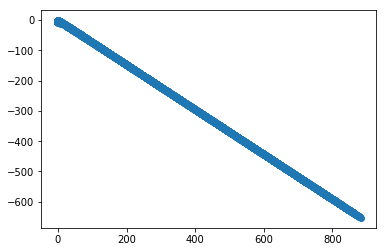

42100
Iterations: 42100	 Discriminator loss: 66.6379	 Generator loss: 42.8373


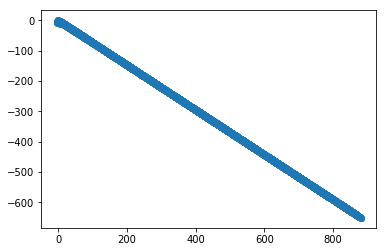

42200
Iterations: 42200	 Discriminator loss: 66.4411	 Generator loss: 42.4922


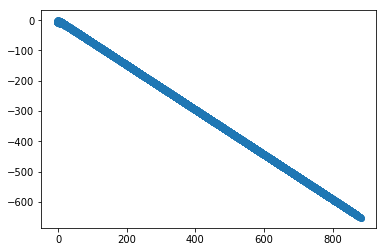

42300
Iterations: 42300	 Discriminator loss: 66.4204	 Generator loss: 42.4303


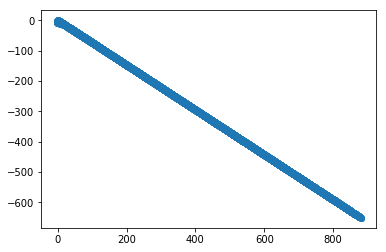

42400
Iterations: 42400	 Discriminator loss: 66.2628	 Generator loss: 42.2317


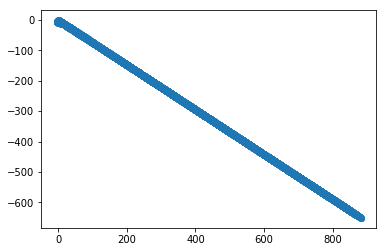

42500
Iterations: 42500	 Discriminator loss: 66.1798	 Generator loss: 42.3714


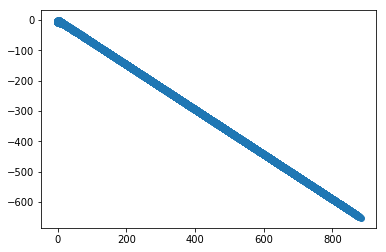

42600
Iterations: 42600	 Discriminator loss: 66.0155	 Generator loss: 42.6652


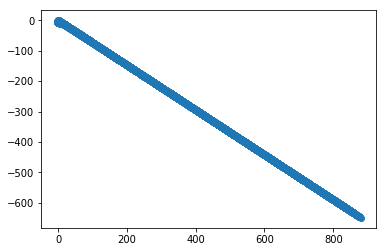

42700
Iterations: 42700	 Discriminator loss: 65.8672	 Generator loss: 42.0879


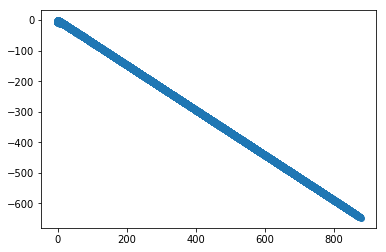

42800
Iterations: 42800	 Discriminator loss: 65.6989	 Generator loss: 42.4515


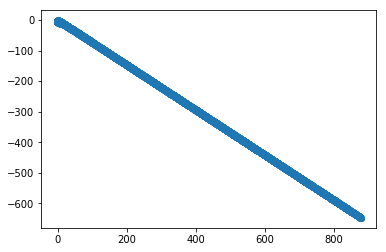

42900
Iterations: 42900	 Discriminator loss: 65.7032	 Generator loss: 42.4208


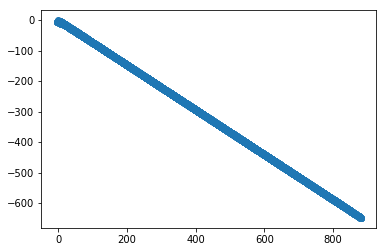

43000
Iterations: 43000	 Discriminator loss: 65.5474	 Generator loss: 42.1134


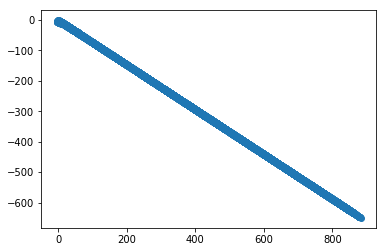

43100
Iterations: 43100	 Discriminator loss: 65.4208	 Generator loss: 42.0349


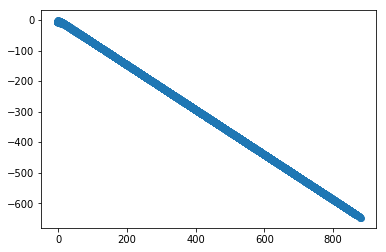

43200
Iterations: 43200	 Discriminator loss: 65.2705	 Generator loss: 42.5786


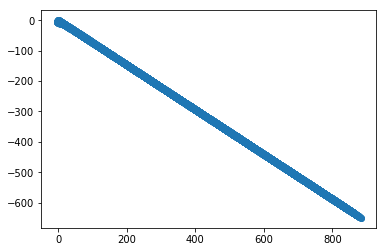

43300
Iterations: 43300	 Discriminator loss: 65.1621	 Generator loss: 42.7840


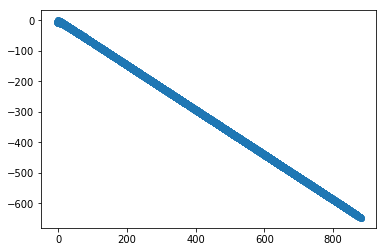

43400
Iterations: 43400	 Discriminator loss: 65.1188	 Generator loss: 41.9909


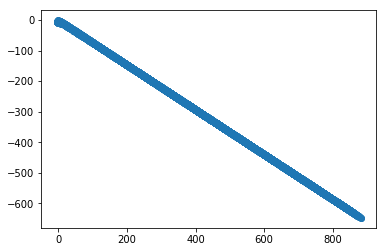

43500
Iterations: 43500	 Discriminator loss: 64.9814	 Generator loss: 42.1869


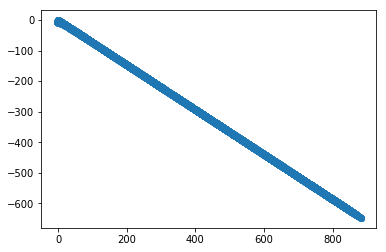

43600
Iterations: 43600	 Discriminator loss: 64.9098	 Generator loss: 42.4971


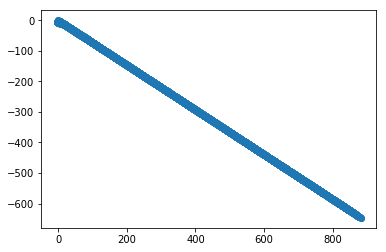

43700
Iterations: 43700	 Discriminator loss: 64.7913	 Generator loss: 41.5330


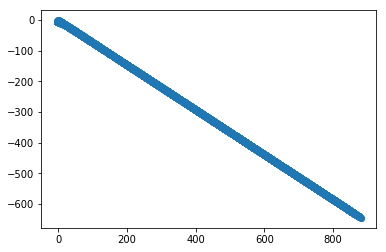

43800
Iterations: 43800	 Discriminator loss: 64.5968	 Generator loss: 41.8189


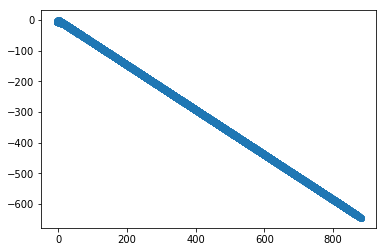

43900
Iterations: 43900	 Discriminator loss: 64.5200	 Generator loss: 41.9287


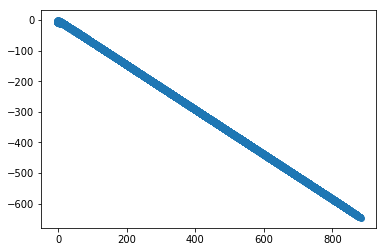

44000
Iterations: 44000	 Discriminator loss: 64.4445	 Generator loss: 41.6012


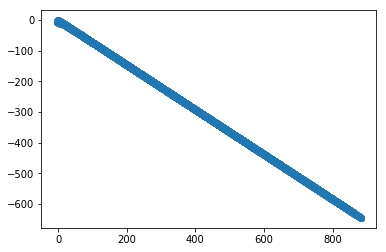

44100
Iterations: 44100	 Discriminator loss: 64.2825	 Generator loss: 41.6595


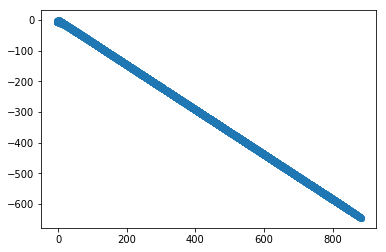

44200
Iterations: 44200	 Discriminator loss: 64.1493	 Generator loss: 41.7955


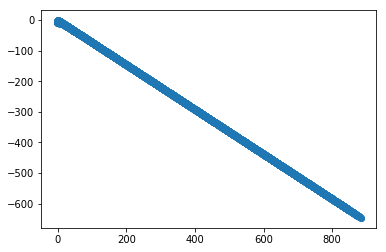

44300
Iterations: 44300	 Discriminator loss: 64.1081	 Generator loss: 41.6713


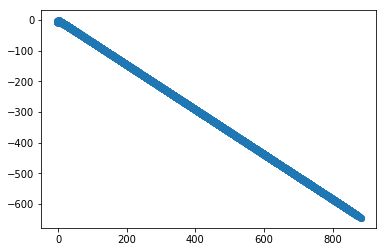

44400
Iterations: 44400	 Discriminator loss: 63.9293	 Generator loss: 41.3083


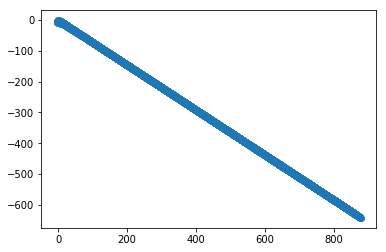

44500
Iterations: 44500	 Discriminator loss: 63.7895	 Generator loss: 41.9808


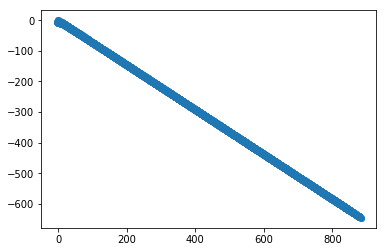

44600
Iterations: 44600	 Discriminator loss: 63.6736	 Generator loss: 41.5557


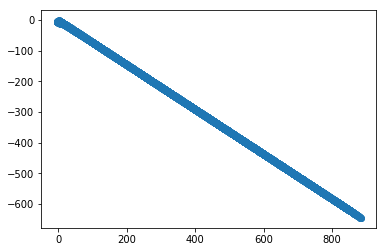

44700
Iterations: 44700	 Discriminator loss: 63.5799	 Generator loss: 41.1963


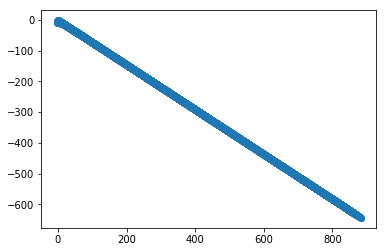

44800
Iterations: 44800	 Discriminator loss: 63.4810	 Generator loss: 41.5622


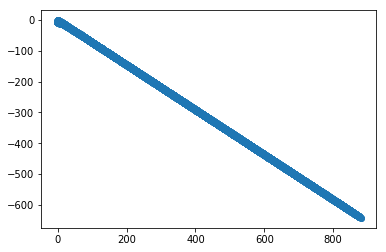

44900
Iterations: 44900	 Discriminator loss: 63.3541	 Generator loss: 41.5959


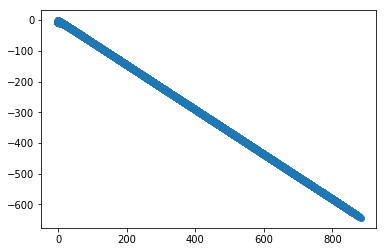

45000
Iterations: 45000	 Discriminator loss: 63.2628	 Generator loss: 41.3418


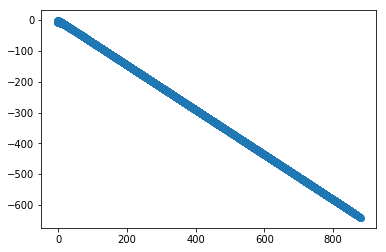

45100
Iterations: 45100	 Discriminator loss: 63.1742	 Generator loss: 41.1014


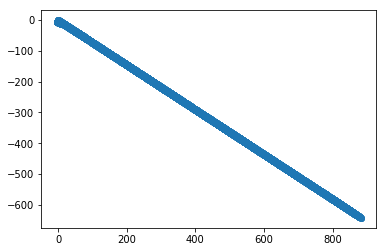

45200
Iterations: 45200	 Discriminator loss: 63.0761	 Generator loss: 41.2458


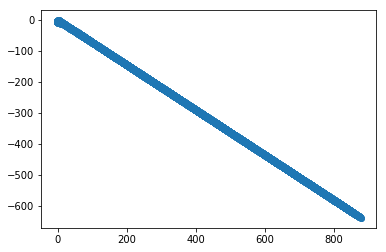

45300
Iterations: 45300	 Discriminator loss: 62.8091	 Generator loss: 41.4526


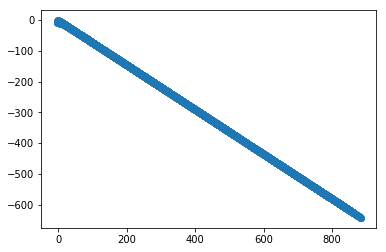

45400
Iterations: 45400	 Discriminator loss: 62.8100	 Generator loss: 41.2803


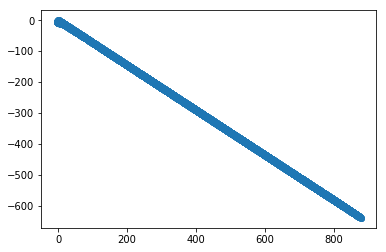

45500
Iterations: 45500	 Discriminator loss: 62.6663	 Generator loss: 41.2002


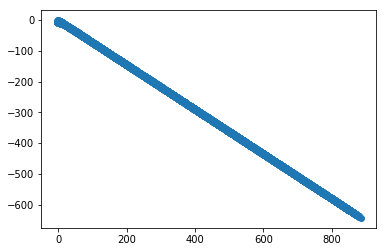

45600
Iterations: 45600	 Discriminator loss: 62.5420	 Generator loss: 41.2724


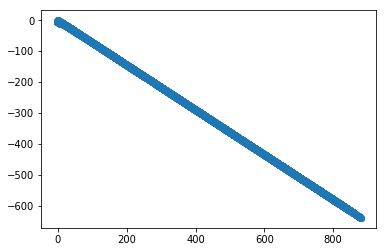

45700
Iterations: 45700	 Discriminator loss: 62.4092	 Generator loss: 41.2776


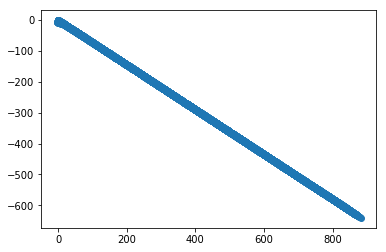

45800
Iterations: 45800	 Discriminator loss: 62.2869	 Generator loss: 40.8192


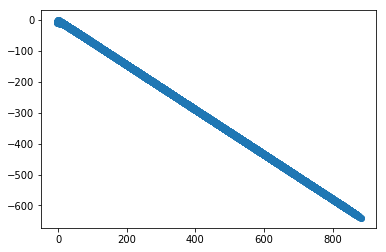

45900
Iterations: 45900	 Discriminator loss: 62.2659	 Generator loss: 40.8285


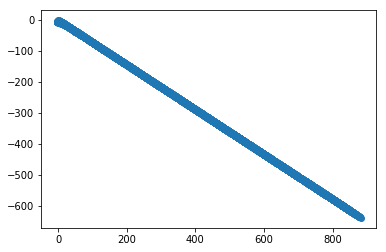

46000
Iterations: 46000	 Discriminator loss: 62.0520	 Generator loss: 40.9039


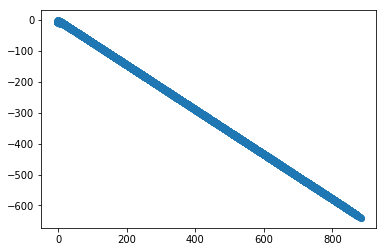

46100
Iterations: 46100	 Discriminator loss: 62.0181	 Generator loss: 40.4683


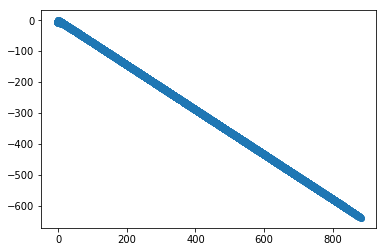

46200
Iterations: 46200	 Discriminator loss: 61.8552	 Generator loss: 40.7459


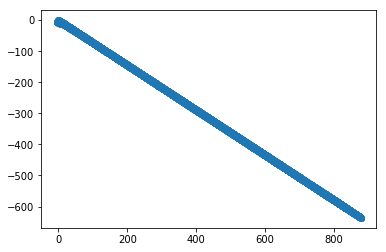

46300
Iterations: 46300	 Discriminator loss: 61.7763	 Generator loss: 40.7124


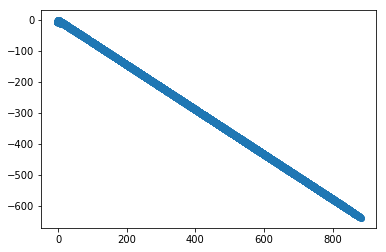

46400
Iterations: 46400	 Discriminator loss: 61.6893	 Generator loss: 40.8070


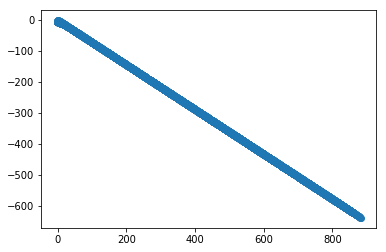

46500
Iterations: 46500	 Discriminator loss: 61.4910	 Generator loss: 40.4532


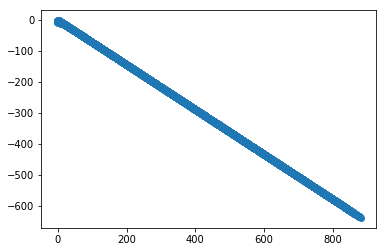

46600
Iterations: 46600	 Discriminator loss: 61.4673	 Generator loss: 40.6556


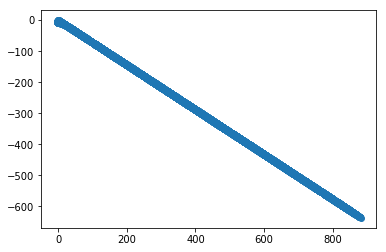

46700
Iterations: 46700	 Discriminator loss: 61.2891	 Generator loss: 40.2726


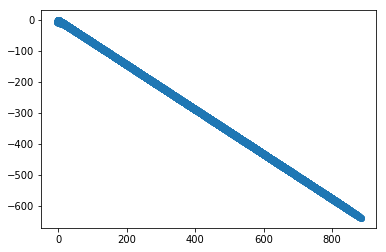

46800
Iterations: 46800	 Discriminator loss: 61.1863	 Generator loss: 40.6023


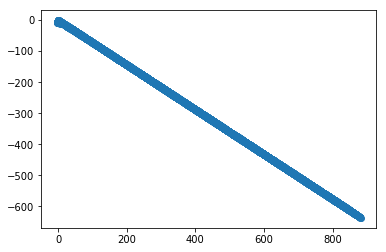

46900
Iterations: 46900	 Discriminator loss: 61.1553	 Generator loss: 40.5382


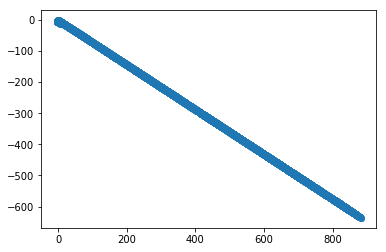

47000
Iterations: 47000	 Discriminator loss: 60.9435	 Generator loss: 40.8942


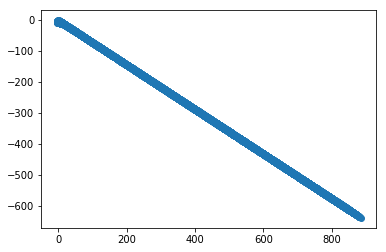

47100
Iterations: 47100	 Discriminator loss: 60.8238	 Generator loss: 40.1890


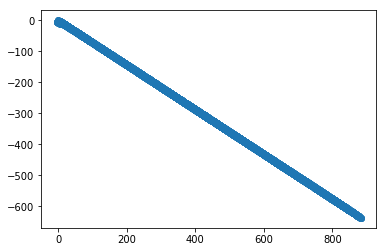

47200
Iterations: 47200	 Discriminator loss: 60.7168	 Generator loss: 40.4697


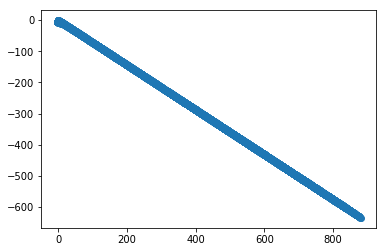

47300
Iterations: 47300	 Discriminator loss: 60.6192	 Generator loss: 40.3589


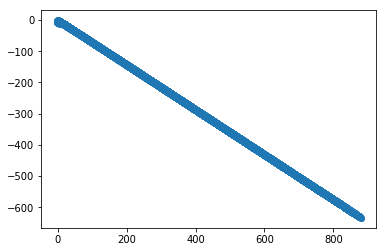

47400
Iterations: 47400	 Discriminator loss: 60.4859	 Generator loss: 40.5090


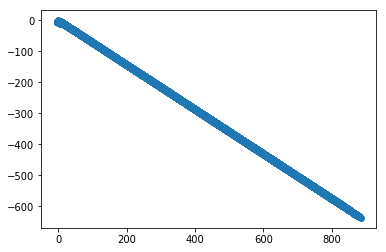

47500
Iterations: 47500	 Discriminator loss: 60.4064	 Generator loss: 40.3907


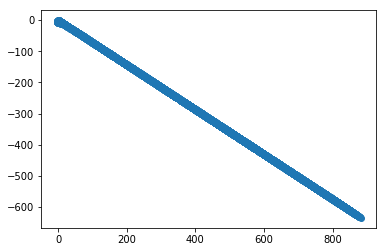

47600
Iterations: 47600	 Discriminator loss: 60.3013	 Generator loss: 39.7874


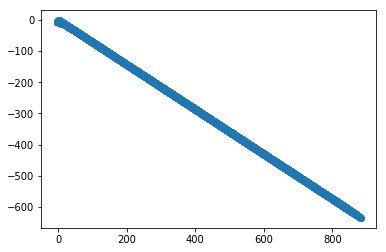

47700
Iterations: 47700	 Discriminator loss: 60.1335	 Generator loss: 39.7187


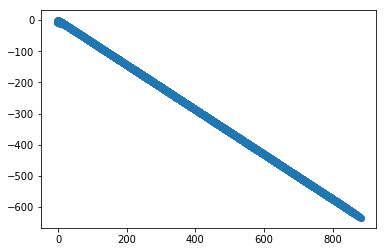

47800
Iterations: 47800	 Discriminator loss: 60.0631	 Generator loss: 40.0526


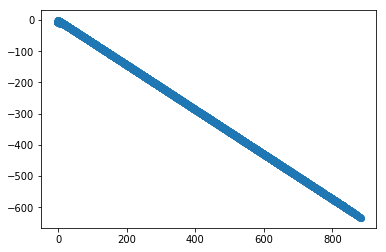

47900
Iterations: 47900	 Discriminator loss: 59.8987	 Generator loss: 40.5445


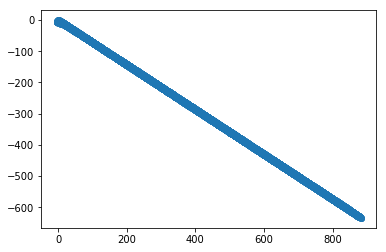

48000
Iterations: 48000	 Discriminator loss: 59.8216	 Generator loss: 39.4497


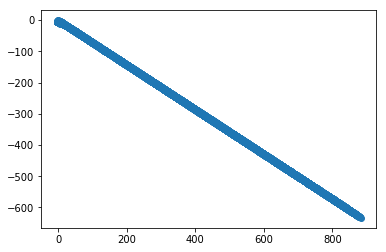

48100
Iterations: 48100	 Discriminator loss: 59.7653	 Generator loss: 39.8522


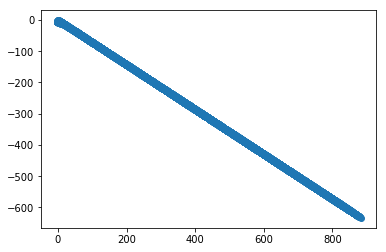

48200
Iterations: 48200	 Discriminator loss: 59.5713	 Generator loss: 40.0044


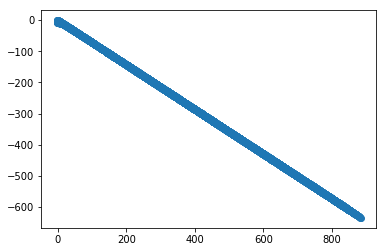

48300
Iterations: 48300	 Discriminator loss: 59.5132	 Generator loss: 39.7567


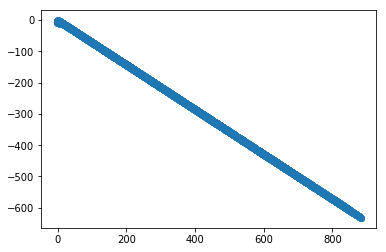

48400
Iterations: 48400	 Discriminator loss: 59.3905	 Generator loss: 39.7075


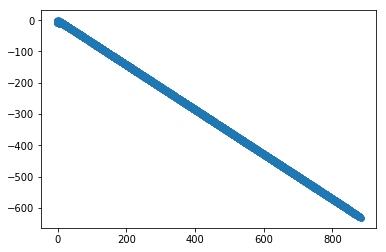

48500
Iterations: 48500	 Discriminator loss: 59.2416	 Generator loss: 39.5206


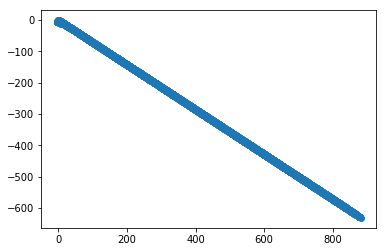

48600
Iterations: 48600	 Discriminator loss: 59.1159	 Generator loss: 39.7075


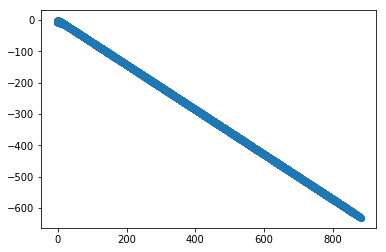

48700
Iterations: 48700	 Discriminator loss: 58.9957	 Generator loss: 39.2856


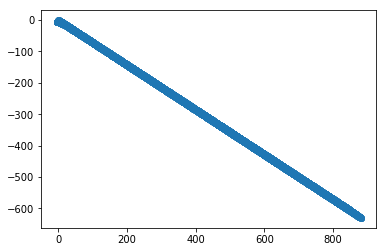

48800
Iterations: 48800	 Discriminator loss: 58.9279	 Generator loss: 39.4850


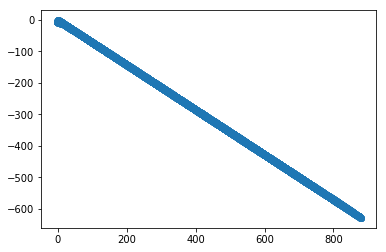

48900
Iterations: 48900	 Discriminator loss: 58.7420	 Generator loss: 39.2992


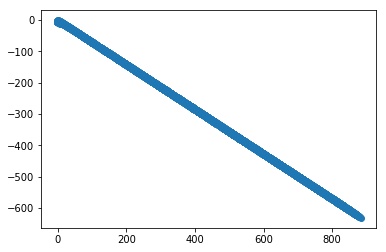

49000
Iterations: 49000	 Discriminator loss: 58.7448	 Generator loss: 39.6438


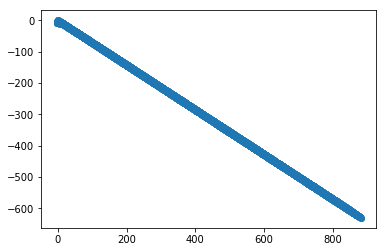

49100
Iterations: 49100	 Discriminator loss: 58.5796	 Generator loss: 39.1441


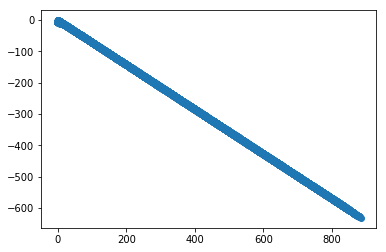

49200
Iterations: 49200	 Discriminator loss: 58.4411	 Generator loss: 39.0416


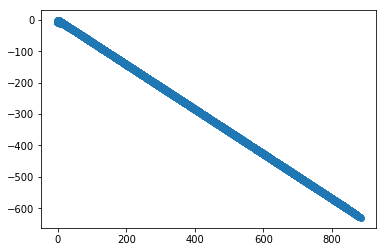

49300
Iterations: 49300	 Discriminator loss: 58.3938	 Generator loss: 39.0090


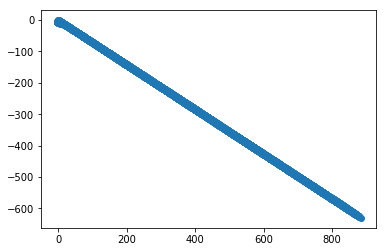

49400
Iterations: 49400	 Discriminator loss: 58.2418	 Generator loss: 39.1193


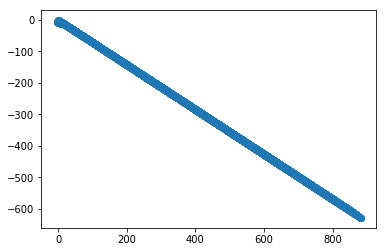

49500
Iterations: 49500	 Discriminator loss: 58.1117	 Generator loss: 39.1787


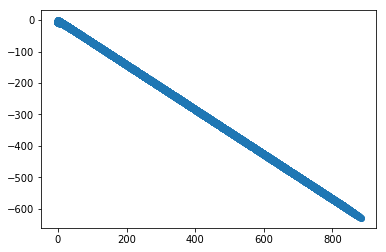

49600
Iterations: 49600	 Discriminator loss: 58.0155	 Generator loss: 38.7518


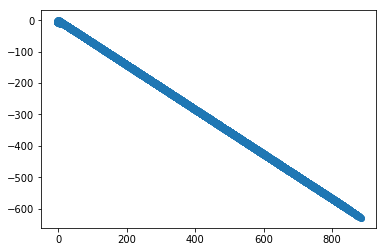

49700
Iterations: 49700	 Discriminator loss: 57.8538	 Generator loss: 39.4598


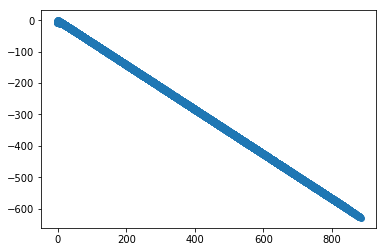

49800
Iterations: 49800	 Discriminator loss: 57.7820	 Generator loss: 38.9365


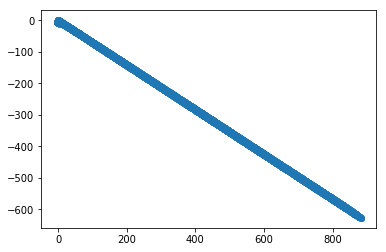

49900
Iterations: 49900	 Discriminator loss: 57.6704	 Generator loss: 39.1226


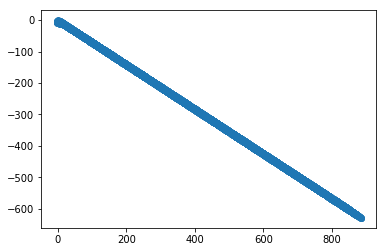

50000
Iterations: 50000	 Discriminator loss: 57.5378	 Generator loss: 38.8861


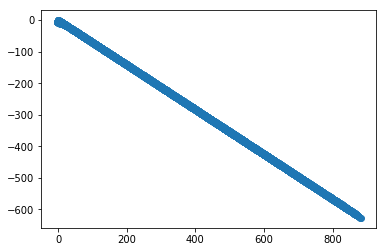

50100
Iterations: 50100	 Discriminator loss: 57.4841	 Generator loss: 38.5645


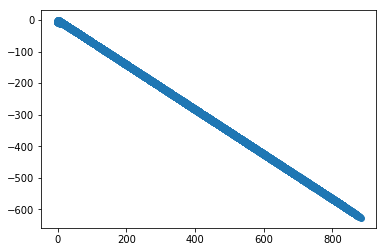

50200
Iterations: 50200	 Discriminator loss: 57.3301	 Generator loss: 38.8230


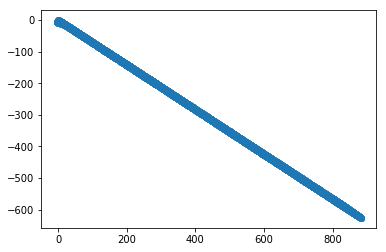

50300
Iterations: 50300	 Discriminator loss: 57.2011	 Generator loss: 38.8648


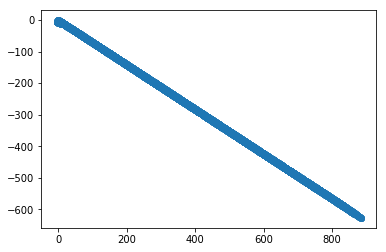

50400
Iterations: 50400	 Discriminator loss: 57.0450	 Generator loss: 38.6073


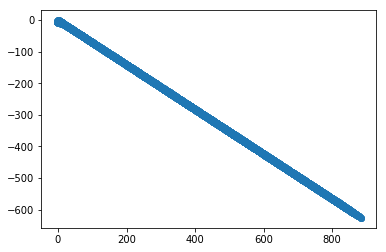

50500
Iterations: 50500	 Discriminator loss: 56.9480	 Generator loss: 38.3527


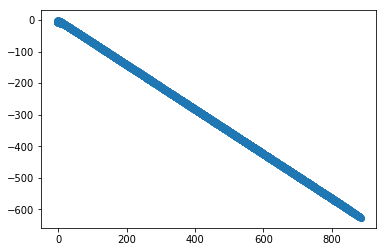

50600
Iterations: 50600	 Discriminator loss: 56.8370	 Generator loss: 38.8517


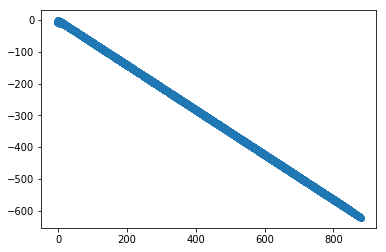

50700
Iterations: 50700	 Discriminator loss: 56.7334	 Generator loss: 38.3628


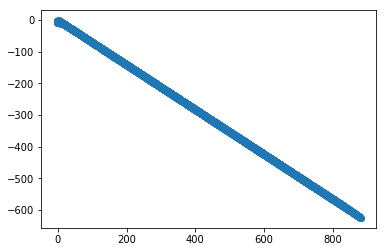

50800
Iterations: 50800	 Discriminator loss: 56.5874	 Generator loss: 38.1440


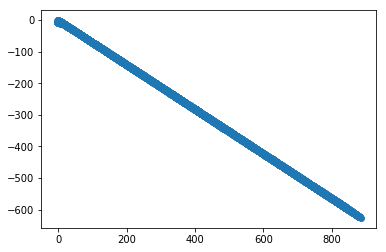

50900
Iterations: 50900	 Discriminator loss: 56.4598	 Generator loss: 38.2482


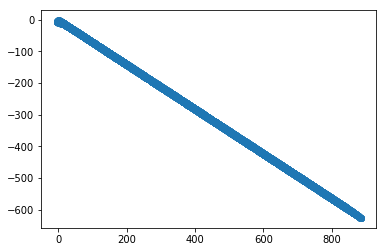

51000
Iterations: 51000	 Discriminator loss: 56.3698	 Generator loss: 37.9905


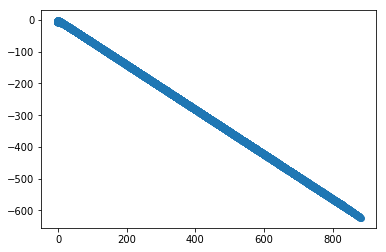

51100
Iterations: 51100	 Discriminator loss: 56.2589	 Generator loss: 38.1436


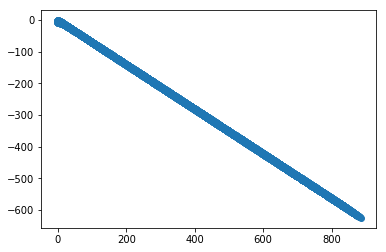

51200
Iterations: 51200	 Discriminator loss: 56.1482	 Generator loss: 38.0997


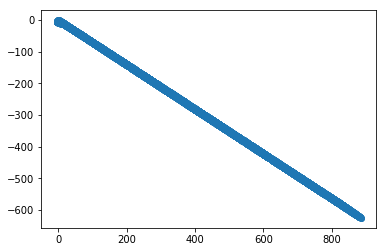

51300
Iterations: 51300	 Discriminator loss: 56.0175	 Generator loss: 38.1921


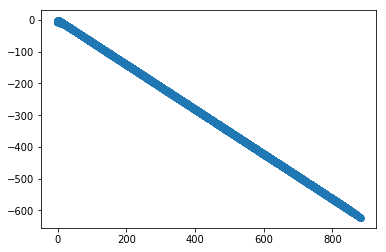

KeyboardInterrupt: 

In [18]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(100001):
    X_batch = data
    #Z_batch = np.asarray(sample_z(10000,2))
    _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: sample_z(10000)})
    _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: sample_z(10000)})
    
    if (i%100) == 0:
        print(i)
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
        g = sess.run(G_sample, feed_dict={Z : sample_z(10000)})
        plt.scatter(g[...,0],g[...,1])
        plt.show()
    
    #print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))